# Imports and paths

In [1]:
import pandas as pd
import os
import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
np.__version__

'1.16.4'

In [2]:
idat_dir='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/'

#samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet.csv'
#samplesheets_keepers='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet_keepers.csv'

samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/299_Erlangener_Faelle_850K_edited_SJ_KK.xlsx'
#FCD_1a_2a_2b_TSC_PMG.xlsx'
#Erlangener_Faelle_850K_edited_SJ.xlsx'
#299_Erlangener_Faelle_850K_edited_SJ.xlsx

phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'

output_path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/preprocess_outputs/'
output_pickle=output_path+'methyl_array.pkl'

glob.glob('/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')


['/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R04C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R01C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R07C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R03C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R05C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R06C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R02C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/2029

In [3]:
#basenamelist=glob.glob(path+'*/*.idat');basenamelist[:4]

## Processing of phenosheet 

In [4]:
import IDAT_Processor
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [3]:
from IDAT_Processor import PreProcessIDATs, PreProcessPhenoData

IndentationError: unexpected indent (IDAT_Processor.py, line 2060)

In [4]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [5]:
pheno_sheet = pd.read_excel(samplesheet,header=0);pheno_sheet

ID  ID_MATERIAL_TYP             txt_idat  ALTER OP  ALTER Beginn  \
0    131972            54938  202818860053_R04C01      11.0           0.0   
1    131974            54939  202818860053_R05C01      11.0           0.0   
2    131976            54940  202818860053_R06C01      27.0           0.0   
3    131978            54941  202818860053_R07C01      27.0           0.0   
4    131980            54942  202818860053_R08C01      27.0           0.0   
..      ...              ...                  ...       ...           ...   
287  134752            56533  203220070086_R07C01       1.0           0.0   
288  134754            56534  203220070086_R08C01       3.0           0.0   
289  134756            56535  203220070058_R01C01       1.0           0.0   
290  134758            56536  203220070058_R02C01       1.0           0.0   
291  134760            56537  203220070058_R03C01       1.0           0.0   

     DAUER Dauer Gruppe SUPPLIER_NUMBER    Lokalisation Lokalisation Gruppe  \
0      0.0            0    SN 83/10 III  temporal - NCx              Cortex   
1      0.0            0    SN 83/10 III   temporal - WM           Marklager   
2      0.0            0   SN 120/16 III  temporal - NCx              Cortex   
3      0.0            0   SN 120/16 III   temporal - WM           Marklager   
4      0.0            0     SN 120/16 I   frontal - NCx              Cortex   
..     ...          ...             ...             ...                 ...   
287    1.0          1-5     1467/16 III         frontal            gemischt   
288    3.0          1-5       1061/17 7         frontal            gemischt   
289    1.0          1-5     1714/17 II2         frontal            gemischt   
290    1.0          1-5      182/18 IV1         frontal            gemischt   
291    1.0          1-5       1909/17 6         frontal            gemischt   

     ... PATIENT_GESCHLECHT KLINIK icEEG DNA Cluster  \
0    ...                  f   UKER   NaN        FFPE   
1    ...                  f   UKER   NaN        FFPE   
2    ...                  m   UKER   NaN        FFPE   
3    ...                  m   UKER   NaN        FFPE   
4    ...                  m   UKER   NaN        FFPE   
..   ...                ...    ...   ...         ...   
287  ...                  m   Mara   NaN        FFPE   
288  ...                  f   Mara   NaN        FFPE   
289  ...                  m   Mara   NaN        FFPE   
290  ...                  m   Mara   NaN        FFPE   
291  ...                  f    VGT   NaN        FFPE   

                                         txt_KOMMENTAR    PATIENT_NACHNAME  \
0    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
1    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
2    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
3    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
4    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
..                                                 ...                 ...   
287  Epilepsie seit der 1. Lebenswoche bei gesicher...         1467/16 III   
288  Frontallappenepilepsie links bei tuberöser Skl...           1061/17 7   
289  Links frontale Epilepsie bei tuberöser Skleros...         1714/17 II2   
290   Rechts frontale Epilepsie bei tuberöser Sklerose          182/18 IV1   
291  Epilepsie rechts zentral/frontal bei tuberöser...           1909/17 6   

    PATIENT_VORNAME dat_PATIENT_GEBURTSTAG v11b4_MaxCalScore  \
0              UKER               00:00:00           0,4535    
1              UKER               00:00:00           0,0147    
2              UKER               00:00:00           0,2614    
3              UKER               00:00:00           0,0101    
4              UKER               00:00:00           0,1998    
..              ...                    ...               ...   
287            Mara               00:00:00           0,2662    
288          

In [6]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Cluster DX', 
              include_columns={'ALTER Beginn':'age_onset',
                               'ALTER OP':'age_surgery',
                               'DAUER':'duration',                               
                               #'Lokalisation':'localisation', 
                               'Einsenderdiagnose':'diagnosis',
                               'KLINIK':'center',
                               'PATIENT_GESCHLECHT':'sex',
                               'SUPPLIER_NUMBER':'case_ID', 
                               'txt_idat':'identifier',
                               'Dauer Gruppe': 'duration_group',
                               'Lokalisation Gruppe': 'location_wm_cx',
                               'Lokalisation Cluster': 'location_region'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [7]:
phenodata.format_sex_column('m','f')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01  
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01  
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01  
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01  
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01  
..             ...  ..            ...            ...                  ...  
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01  
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01  
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01  
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01  
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01  

[292 rows x 14 columns]

In [10]:
phenodata.create_ID(disease='disease', sample='identifier')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [11]:
phenodata.pheno_sheet.isnull().sum()


age_onset          94
age_surgery         1
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              4
location_region     4
location_wm_cx      4
sex                 1
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [12]:
keys=['age_surgery','center', 'location_region','location_wm_cx', 'sex']

In [13]:
imputation_df=phenodata.pheno_sheet[keys]; imputation_df

age_surgery center location_region location_wm_cx sex
0           11.0   UKER        temporal         Cortex   F
1           11.0   UKER        temporal      Marklager   F
2           27.0   UKER        temporal         Cortex   M
3           27.0   UKER        temporal      Marklager   M
4           27.0   UKER         frontal         Cortex   M
..           ...    ...             ...            ...  ..
287          1.0   Mara         frontal       gemischt   M
288          3.0   Mara         frontal       gemischt   F
289          1.0   Mara         frontal       gemischt   M
290          1.0   Mara         frontal       gemischt   M
291          1.0    VGT         frontal       gemischt   F

[292 rows x 5 columns]

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(imputation_df)
test_pheno=pd.DataFrame(imp.transform(imputation_df),index = imputation_df.index.to_numpy(),
                  columns=imputation_df.columns)
#imputed=imp.transform(phenodata.pheno_sheet)    
test_pheno.isnull().sum()

age_surgery        0
center             0
location_region    0
location_wm_cx     0
sex                0
dtype: int64

In [15]:
phenodata.pheno_sheet[keys]=test_pheno.to_numpy()

In [16]:
phenodata.pheno_sheet.isnull().sum()

age_onset          94
age_surgery         0
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              0
location_region     0
location_wm_cx      0
sex                 0
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [17]:
#pheno_sheet=phenodata.format_custom(
#              basename_col='txt_idat', 
#              disease_class_column='Diagnosis', 
#              include_columns={'age':'age',
#                               'sex':'sex',
#                               'Center':'Center',
#                               'Sample':'Sample', 
#                               'Lokalisation':'Lokalisation', 
#                               #'txt_idat':'txt_idat'
#                              }
#                       )

In [18]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [19]:
exclude_disease_list=[
 
 'FCD 1A',
 
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 
 'mMCD',
 'MOGHE',
 
 'TLE/CTRL',
 
 ]
phenodata.pheno_sheet['disease'].unique().tolist()

['CTRL',
 'FCD 1A',
 'FCD 2A',
 'FCD 2B',
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 'HME',
 'mMCD',
 'MOGHE',
 'PMG',
 'PMG_1q',
 'TLE/CTRL',
 'TSC']

In [20]:
phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)]

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[128 rows x 15 columns]

In [21]:
phenodata.remove_diseases(exclude_disease_list)

In [22]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[128 rows x 15 columns]

In [23]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [24]:
#pheno_sheet.to_csv(phenosheet, index=False)

In [25]:
pd.read_csv(phenosheet, index_col=False)

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
123        0.0          1.0   
124        0.0          3.0   
125        0.0          1.0   
126        0.0          1.0   
127        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
123  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
124  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
125  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
126  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
127  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
123       1.0            1-5         TSC na   Mara         frontal   
124       3.0            1-5         TSC na   Mara         frontal   
125       1.0            1-5         TSC na   Mara         frontal   
126       1.0            1-5         TSC na   Mara         frontal   
127       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
123       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
124       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
125       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
126       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
127       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
123   TSC.203220070086_R07C01  
124   TSC.203220070086_R08C01  
125   TSC.203220070058_R01C01  
126   TSC.203220070058_R02C01  
127   TSC.203220070058_R03C01  

[128 rows x 15 columns]

In [26]:
pd.read_csv(phenosheet, index_col=False)['disease'].unique()

array(['CTRL', 'FCD 2A', 'FCD 2B', 'HME', 'PMG', 'PMG_1q', 'TSC'],
      dtype=object)

# IDAT Processing modified class

## Loading data

In [3]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [4]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version 3.9 (BiocManager 1.30.8), ?BiocManager::install for help


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version '3.9' is out-of-date; the current release version '3.10'
  is available with R version '3.6'; see https://bioconductor.org/install




In [ ]:
import multiprocessing
n_workers=multiprocessing.cpu_count()
preproidat.load_idats(use_cache=True, rename_samples=True, parallel=True, nworkers=n_workers, verbose=True)

## Quality control plots

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


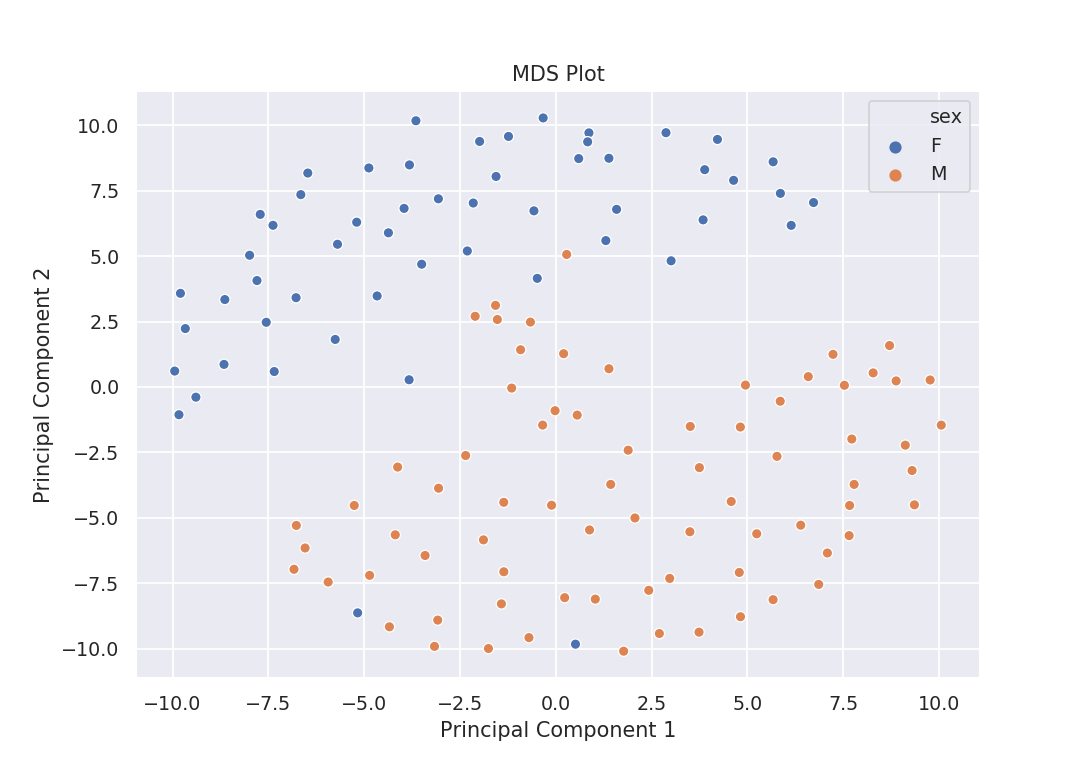

In [27]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
###dataframe=dataframe,pheno=pandas2ri.ri2py(preproidat.pheno),
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='sex', components=(0,1))

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



<IPython.core.display.Javascript object>


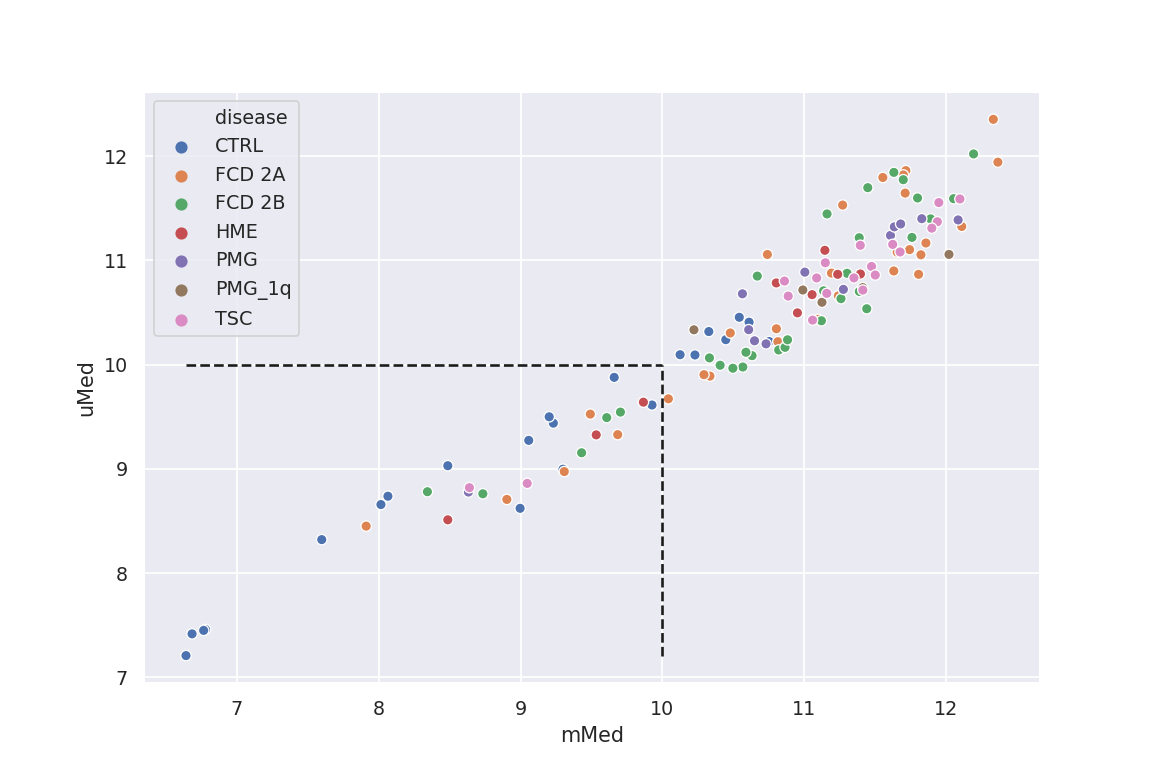

In [28]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='disease', thresh=10)     

<IPython.core.display.Javascript object>


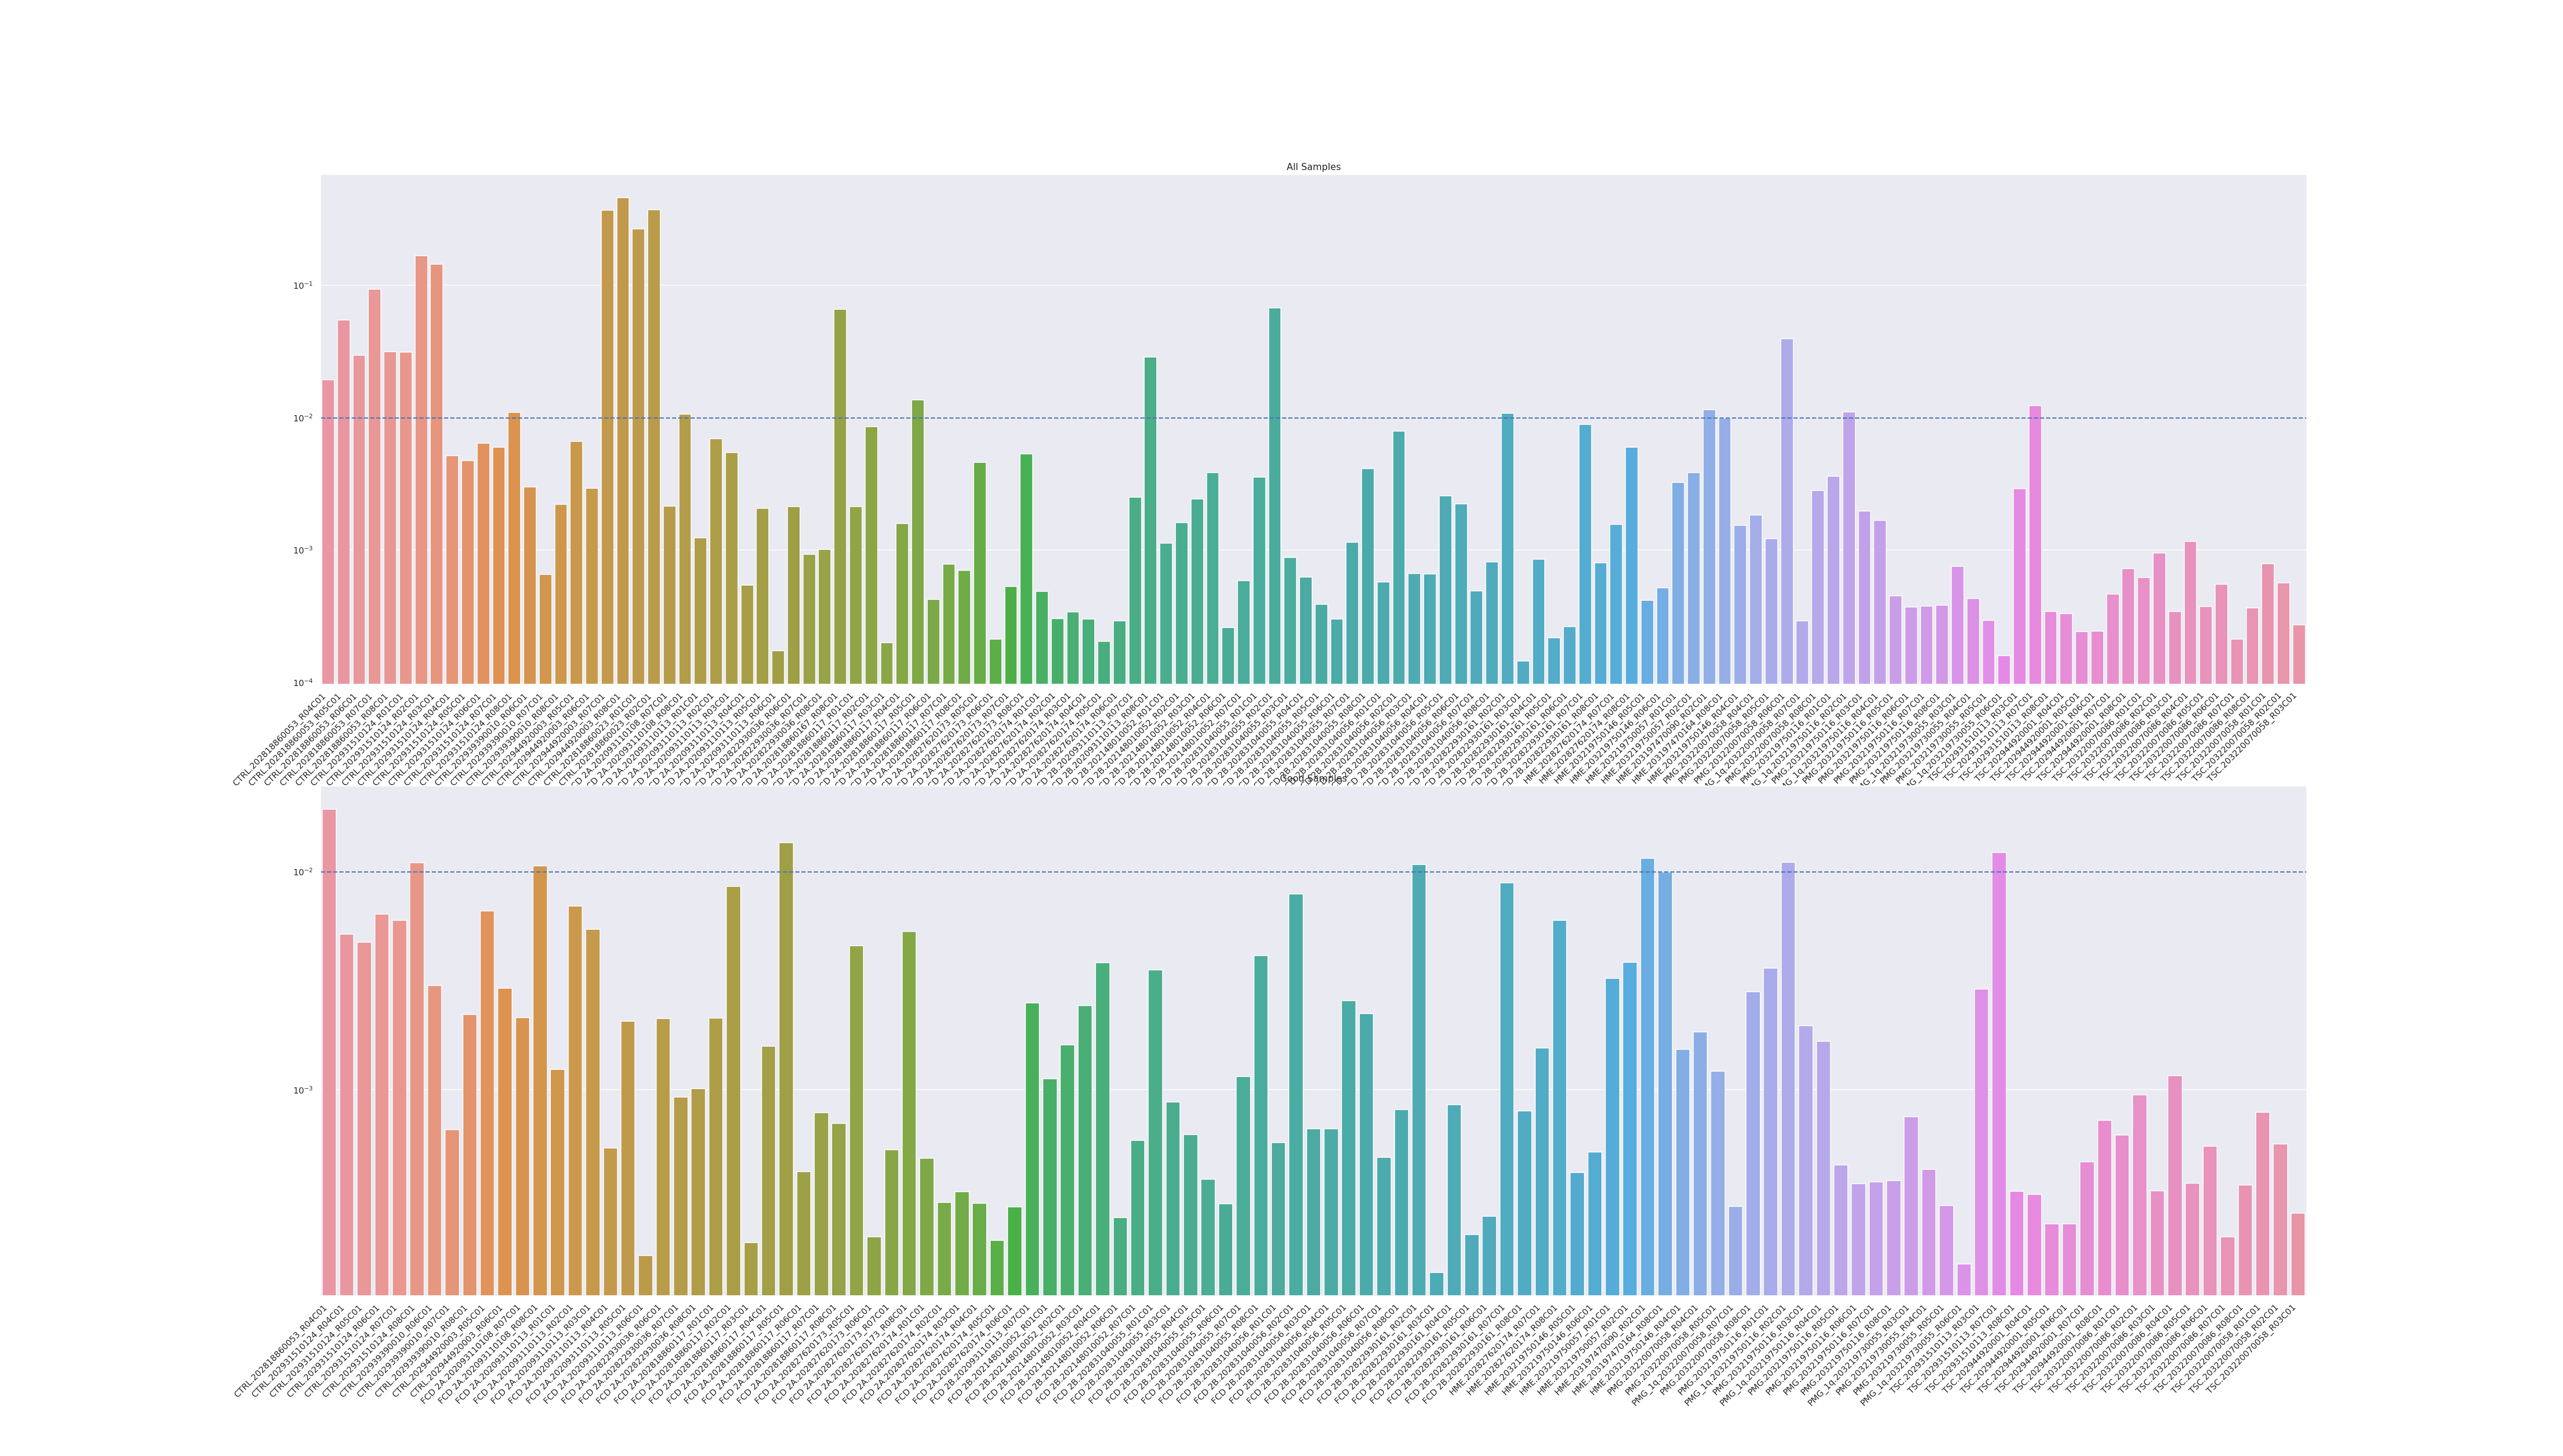

/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py:700: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



In [29]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
###########to_do##############
preproidat.plt_meandetP(detPcut=0.01, SampleCutoff=0.1, log_scale=True, plot='all')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


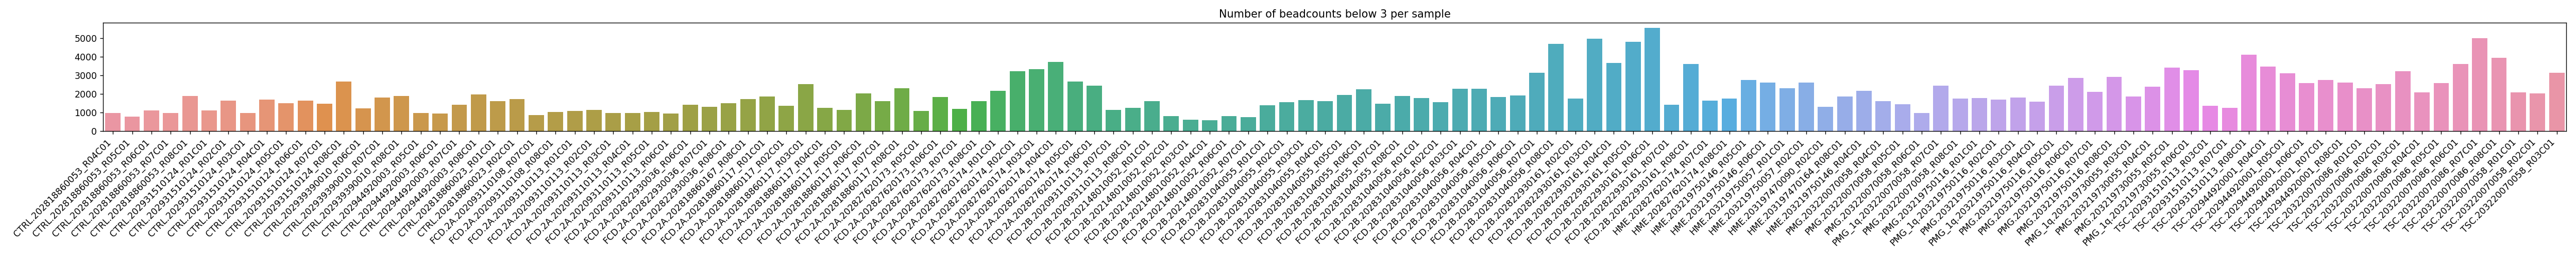

In [6]:
%matplotlib notebook
preproidat.plt_failedbeads(RGset=preproidat.RGset, percent=False)


In [ ]:
mvals_raw,mvals= preproidat.getM(preproidat.RGset)
betas_raw,betas= preproidat.getBeta(preproidat.RGset)

<IPython.core.display.Javascript object>


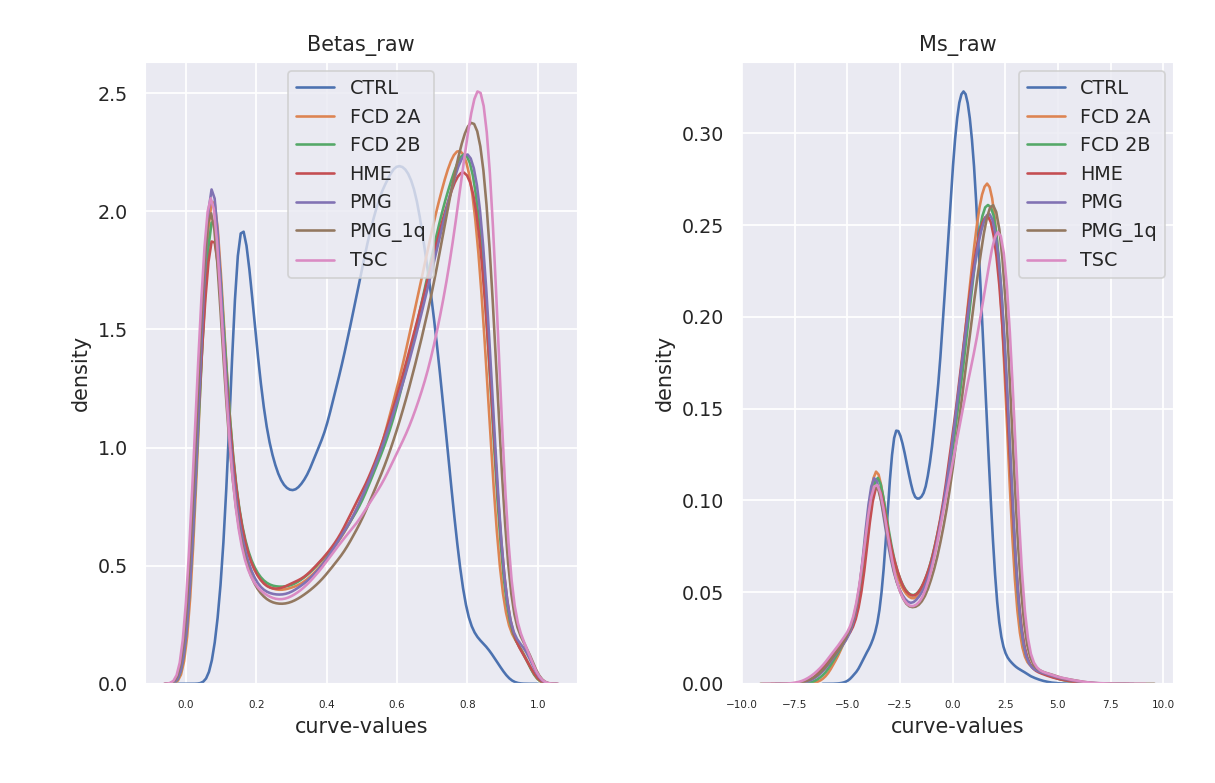

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [36]:
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw}, variant="grouped", group_by='disease', nrows=1)

<IPython.core.display.Javascript object>


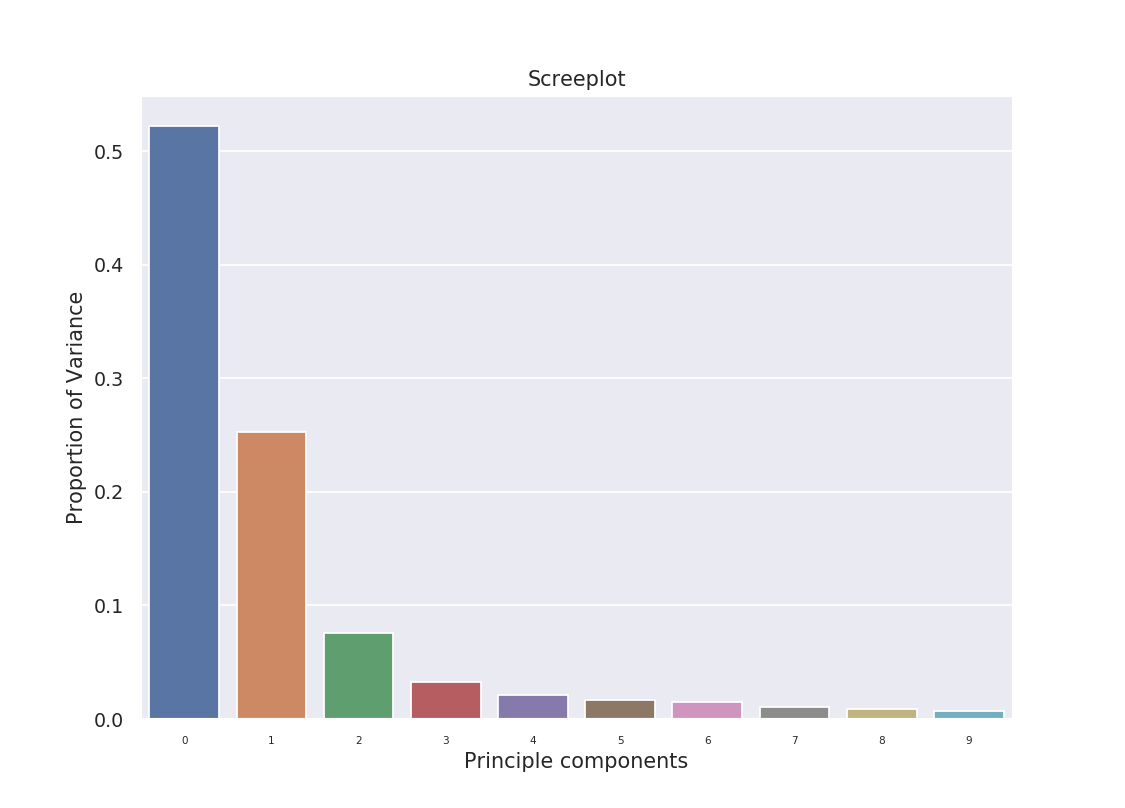

In [37]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

## Normalizing data

In [ ]:
GRset,pheno=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False, RGset=preproidat.RGset)

In [6]:
GRset=preproidat.preprocessFunnorm(celltype_adoption=False, use_cell_count2=False, nPCs=4, RGset=preproidat.RGset_orig)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessFunnorm] Background and dye bias correction with noob


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy

In [16]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          8.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          4.0  /home/D

## Filtering of probes and samples 

### DNAmArray Pipeline

In [110]:
beta_py, mval_py, pheno_py=preproidat.DNAmArray_processing(GRset=GRset, RGset=preproidat.RGset_orig, filterXY=True, 
                                                           filterNoCG=True, excludeXreactiveprobes=True, dropSnPs=True, 
                                                           mask_probes=True, cutbead=3, zeropoint=True, what="both", 
                                                           ProbeCutoff=0.10, SampleCutoff=0.03, array_type='EPIC', 
                                                           badSampleCutoff=10, rm_badsamples=False, rm_badprobes=False,
                                                           detPFilter=False, detPcut=0.01, addQC=False, verbose=True, 
                                                           autoimpute=True, imputation_method="imputePCA")



 Now performing probefiltering on beadcount
Filtering on number of beads... 

On average
 
0.21
 
% of the probes (
 
1051815
 
) have number of beads below
 
3
 


Filtering on zero intensities... 

On average
 
0.005
 
% of the Type II probes (
 
723910
 
) have Red and/or Green intensity below 1 

On average
 
0.039
 
% of the Type I probes (
 
99908
 
), measured in Green channel, have intensity below 1 

On average
 
0.057
 
% of the Type I probes (
 
184454
 
), measured in Red channel, have intensity below 1 

Set filtered probes in Red and/or Green channels to NA... 

... done 
 
100
 
 out of 
 
128
 
 ... 


 Now performing reduce function
Calculate and filter on detection P-value... 

On average
 
5.68
 
% of the CpGs (
 
866091
 
) have detection P-value above the threshold 
 
0.01
 


Transform to 
 
both
 
-values... 

Set +/-Inf to +/-16... 

On average
 
0.23
 
% of the beta probes (
 
866091
 
) were set to NA in the probe filtering step! 

On average
 
0.23
 
% of th

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.




 Now removing specific probes for m-values
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
592
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
755265
 
 probes for the analysis before filtering.


 
348452
 
 probes have been removed from further analysis.

 In total there are
 
406813
 
 probes left for the analysis.

 In total there were 
 
93
 
 samples for the analysis before filtering.


 
0
 
 samples have been removed from further analysis.

 In total there are
 
93
 
 samples left for the analysis.

 Now removing specific probes for beta-values 
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
592
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
755265
 
 probes for the analysis before filtering.


 
348452
 
 probes have been removed from

In [111]:
pheno_py

age_onset  age_surgery                                           Basename  \
0         0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1         0.0         49.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         0.0         52.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3         0.0         52.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         0.0         52.0  /home/Deep_Learner/private/network/Methyl_Arra...   
..        ...          ...                                                ...   
88        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
89        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
90        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
91        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
92        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  duration duration_group      diagnosis center  \
0   b202931510124       0.0              0   Control - WM   UKER   
1   b202939390010       0.0              0   Control - WM   UKER   
2   b202939390010       0.0              0  Control - NCx   UKER   
3   b202939390010       0.0              0   Control - WM   UKER   
4   b202944920003       0.0              0   Control - WM   UKER   
..            ...       ...            ...            ...    ...   
88  b203220070086       1.0            1-5         TSC na   Mara   
89  b203220070086       3.0            1-5         TSC na   Mara   
90  b203220070058       1.0            1-5         TSC na   Mara   
91  b203220070058       1.0            1-5         TSC na   Mara   
92  b203220070058       1.0            1-5         TSC na    VGT   

   location_region location_wm_cx  ...        case_ID        disease  \
0         temporal      Marklager  ...  SN 173/09 III   Control - WM   
1          frontal      Marklager  ...     SN 80/16 I   Control - WM   
2          frontal         Cortex  ...     SN 81/16 I  Control - NCx   
3          frontal      Marklager  ...     SN 81/16 I   Control - WM   
4          frontal      Marklager  ...   SN 81/16 III   Control - WM   
..             ...            ...  ...            ...            ...   
88         frontal       gemischt  ...    1467/16 III            TSC   
89         frontal       gemischt  ...      1061/17 7            TSC   
90         frontal       gemischt  ...    1714/17 II2            TSC   
91         frontal       gemischt  ...     182/18 IV1            TSC   
92         frontal       gemischt  ...      1909/17 6            TSC   

             identifier                                 ID  \
0   202931510124_R05C01   Control - WM.202931510124_R05C01   
1   202939390010_R06C01   Control - WM.202939390010_R06C01   
2   202939390010_R07C01  Control - NCx.202939390010_R07C01   
3   202939390010_R08C01   Control - WM.202939390010_R08C01   
4   202944920003_R06C01   Control - WM.202944920003_R06C01   
..                  ...                                ...   
88  203220070086_R07C01            TSC.203220070086_R07C01   
89  203220070086_R08C01            TSC.203220070086_R08C01   
90  203220070058_R01C01            TSC.203220070058_R01C01   
91  203220070058_R02C01            TSC.203220070058_R02C01   
92  203220070058_R03C01            TSC.203220070058_R03C01   

                                            filenames       xMed       yMed  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  11.396070   9.092757   
1   /home/Deep_Learner/private/network/Methyl_Arra...  11.140191   8.531381   
2   /home/Deep_Learner/private/network/Methyl_Arra...  11.113091  11.747354   
3   /home/Deep_Learner/private/network/Methyl_Arra...  10.840778  11.523072   
4   /home/Deep_Learner/private/network/Methyl_Arra...   9.845490  10.492855   
..                                                ...        ...        ...   
88  /home/Deep_Learner/private/network/Methyl_Arra.

In [112]:
mval_py#.isnull().sum()

Control - WM.202931510124_R05C01  \
cg18478105                         -3.651023   
cg14361672                          1.709459   
cg13417420                         -3.795924   
cg26724186                          3.407404   
cg24133276                         -4.260258   
...                                      ...   
cg06889756                          2.170281   
cg02455706                         -1.717263   
cg14585103                          2.381603   
cg10633746                         -4.000635   
cg12623625                          2.875416   

            Control - WM.202939390010_R06C01  \
cg18478105                         -4.246176   
cg14361672                          2.307162   
cg13417420                         -2.303310   
cg26724186                          3.460928   
cg24133276                         -3.431773   
...                                      ...   
cg06889756                          1.243880   
cg02455706                         -2.344572   
cg14585103                          1.633408   
cg10633746                         -1.491286   
cg12623625                          1.676398   

            Control - NCx.202939390010_R07C01  \
cg18478105                          -4.383804   
cg14361672                           1.900389   
cg13417420                          -2.815075   
cg26724186                           3.262530   
cg24133276                          -1.223794   
...                                       ...   
cg06889756                           1.795592   
cg02455706                          -1.058957   
cg14585103                           2.321953   
cg10633746                          -3.492372   
cg12623625                           1.513541   

            Control - WM.202939390010_R08C01  \
cg18478105                         -4.629355   
cg14361672                          2.044058   
cg13417420                         -2.425778   
cg26724186                          3.180783   
cg24133276                         -3.139246   
...                                      ...   
cg06889756                          1.426674   
cg02455706                         -3.627223   
cg14585103                          2.027597   
cg10633746                         -3.480730   
cg12623625                          1.440574   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg18478105                         -4.698907                   -3.499373   
cg14361672                          2.689524                    1.595265   
cg13417420                         -5.076703                   -4.158011   
cg26724186                          2.993017                    3.366196   
cg24133276                         -2.795313                   -3.533122   
...                                      ...                         ...   
cg06889756                          1.537264                    1.778221   
cg02455706                         -4.065970                   -0.277480   
cg14585103                          1.839208                    1.482972   
cg10633746                         -2.677112                   -3.966623   
cg12623625                          1.684593                    1.811413   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R04C01  \
cg18478105                   -3.349860                   -3.049773   
cg14361672                    1.853868                    2.432050   
cg13417420                   -2.897542                   -3.835485   
cg26724186                    3.331270                    3.115771   
cg24133276                   -3.883143                   -2.856737   
...                                ...                         ...   
cg06889756                    1.623094                    1.251255   
cg02455706                   -0.302946                   -2.324164   
cg14585103                    2.128633                    2.103374   
cg10633746                   -2.573367                   -4.034834   
cg1262362

In [113]:
beta_py

Control - WM.202931510124_R05C01  \
cg18478105                          0.073734   
cg14361672                          0.765829   
cg13417420                          0.067161   
cg26724186                          0.913870   
cg24133276                          0.049596   
...                                      ...   
cg06889756                          0.818218   
cg02455706                          0.233202   
cg14585103                          0.838999   
cg10633746                          0.058799   
cg12623625                          0.880069   

            Control - WM.202939390010_R06C01  \
cg18478105                          0.050058   
cg14361672                          0.831907   
cg13417420                          0.168467   
cg26724186                          0.916746   
cg24133276                          0.084810   
...                                      ...   
cg06889756                          0.703118   
cg02455706                          0.164498   
cg14585103                          0.756243   
cg10633746                          0.262371   
cg12623625                          0.761694   

            Control - NCx.202939390010_R07C01  \
cg18478105                           0.045711   
cg14361672                           0.788724   
cg13417420                           0.124416   
cg26724186                           0.905630   
cg24133276                           0.299796   
...                                       ...   
cg06889756                           0.776365   
cg02455706                           0.324315   
cg14585103                           0.833336   
cg10633746                           0.081606   
cg12623625                           0.740603   

            Control - WM.202939390010_R08C01  \
cg18478105                          0.038835   
cg14361672                          0.804841   
cg13417420                          0.156907   
cg26724186                          0.900675   
cg24133276                          0.101930   
...                                      ...   
cg06889756                          0.728870   
cg02455706                          0.074869   
cg14585103                          0.803043   
cg10633746                          0.082213   
cg12623625                          0.730769   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg18478105                          0.037075                    0.081243   
cg14361672                          0.865790                    0.751337   
cg13417420                          0.028779                    0.053045   
cg26724186                          0.888410                    0.911595   
cg24133276                          0.125916                    0.079514   
...                                      ...                         ...   
cg06889756                          0.743750                    0.774268   
cg02455706                          0.056342                    0.452064   
cg14585103                          0.781570                    0.736512   
cg10633746                          0.135213                    0.060118   
cg12623625                          0.762724                    0.778264   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R04C01  \
cg18478105                    0.089322                    0.107749   
cg14361672                    0.783300                    0.843667   
cg13417420                    0.118321                    0.065464   
cg26724186                    0.909625                    0.896571   
cg24133276                    0.063471                    0.121304   
...                                ...                         ...   
cg06889756                    0.754923                    0.704184   
cg02455706                    0.447696                    0.166452   
cg14585103                    0.813885                    0.811219   
cg10633746                    0.143844                    0.057501   
cg1262362

<IPython.core.display.Javascript object>


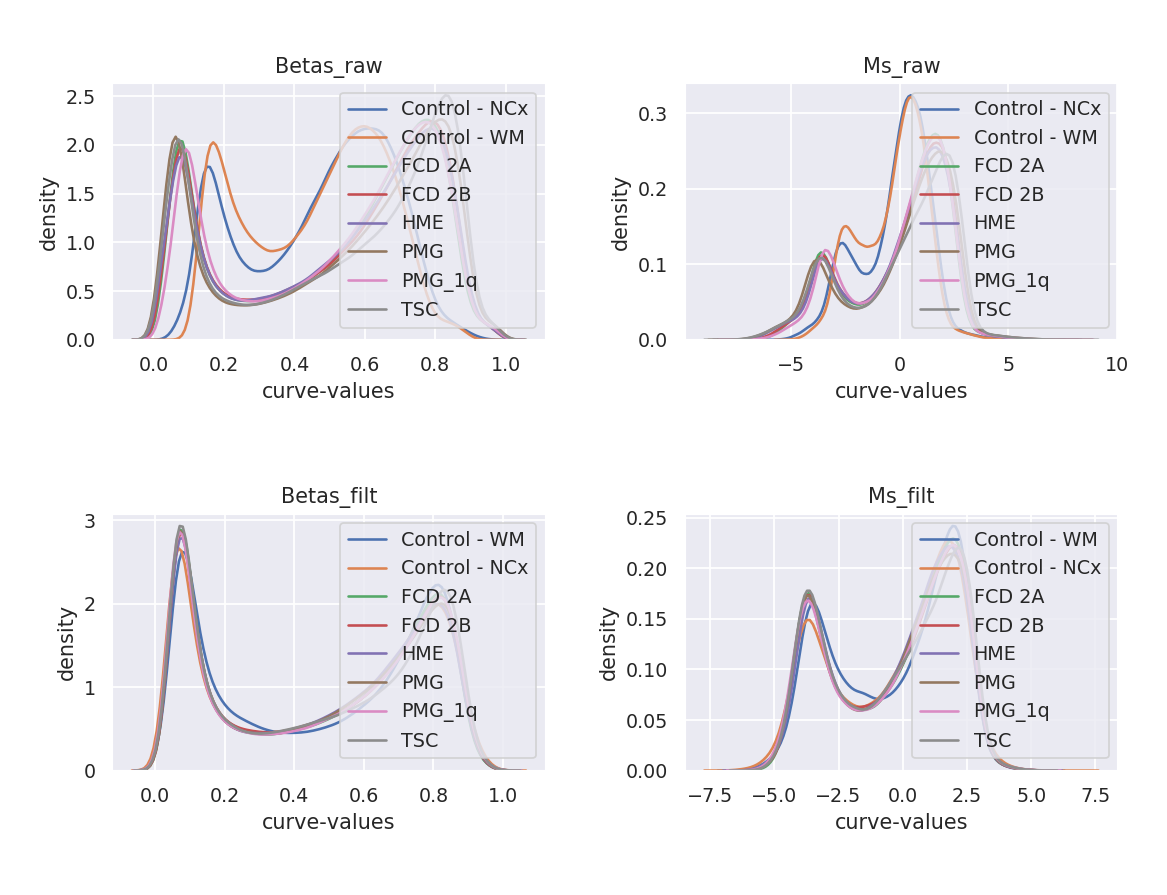

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [114]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


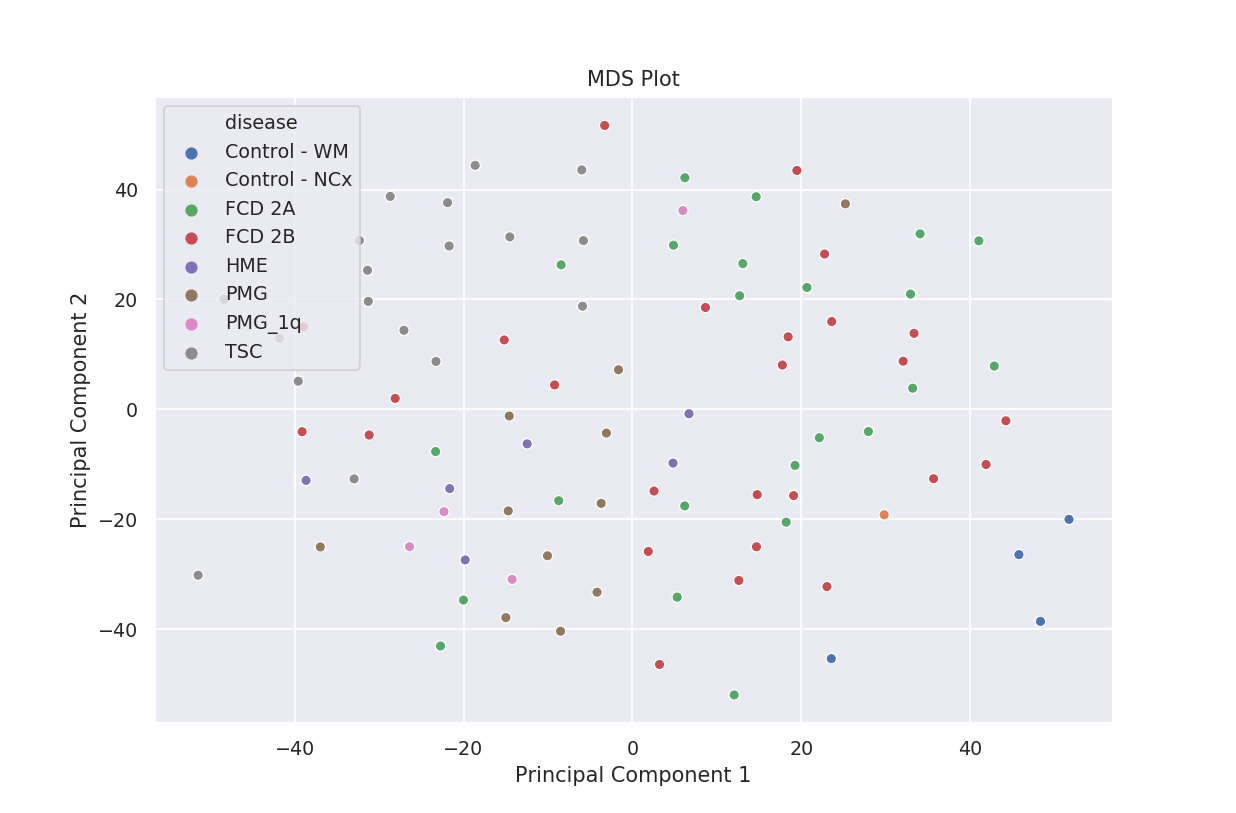

In [115]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


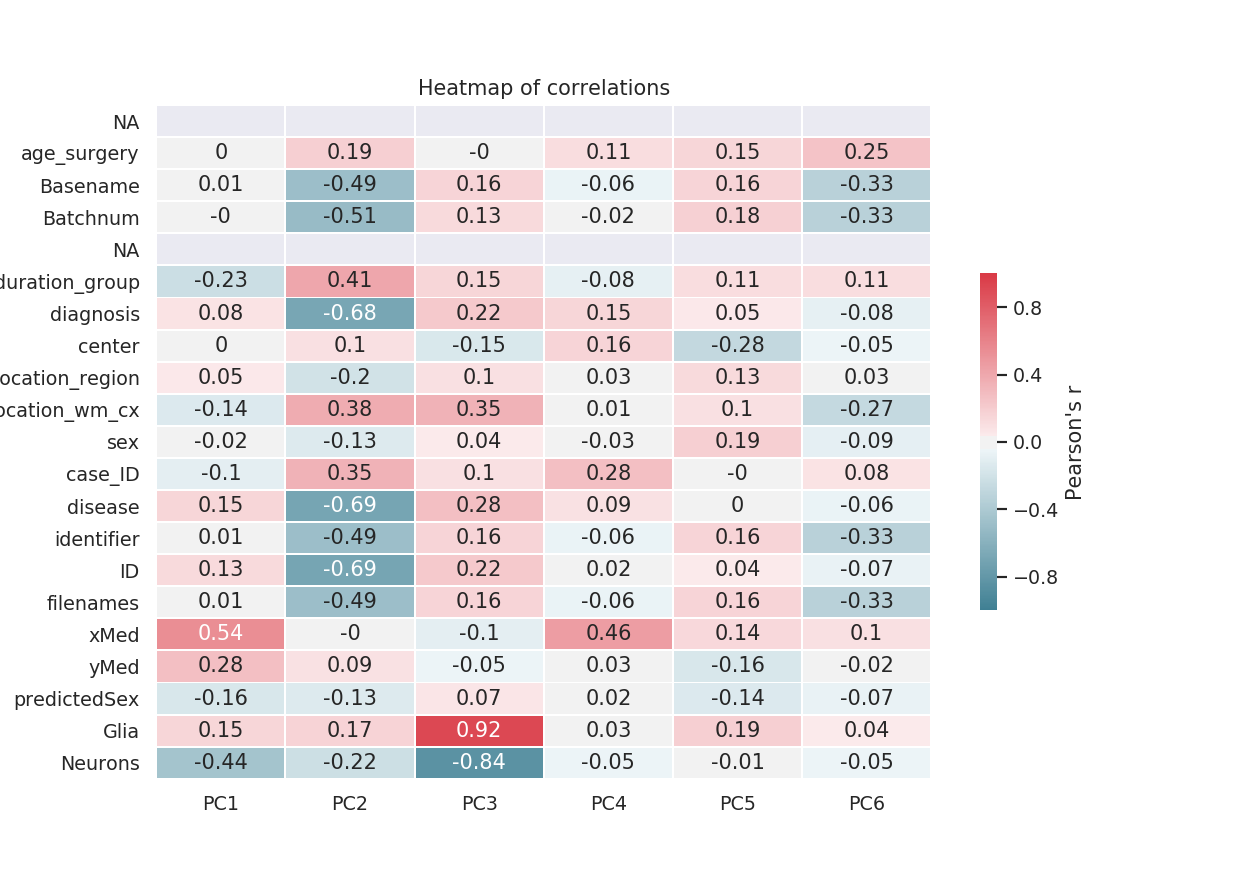

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [116]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [117]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['xMed', 'Glia','location_wm_cx'],
                      #correction_vars=['location_wm_cx'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=50, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'Control - WM-Control - NCx', 2: 'Control - WM-FCD 2A', 3: 'Control - WM-FCD 2B', 4: 'Control - WM-HME', 5: 'Control - WM-PMG', 6: 'Control - WM-PMG_1q', 7: 'Control - WM-TSC', 8: 'Control - NCx-FCD 2A', 9: 'Control - NCx-FCD 2B', 10: 'Control - NCx-HME', 11: 'Control - NCx-PMG', 12: 'Control - NCx-PMG_1q', 13: 'Control - NCx-TSC', 14: 'FCD 2A-FCD 2B', 15: 'FCD 2A-HME', 16: 'FCD 2A-PMG', 17: 'FCD 2A-PMG_1q', 18: 'FCD 2A-TSC', 19: 'FCD 2B-HME', 20: 'FCD 2B-PMG', 21: 'FCD 2B-PMG_1q', 22: 'FCD 2B-TSC', 23: 'HME-PMG', 24: 'HME-PMG_1q', 25: 'HME-TSC', 26: 'PMG-PMG_1q', 27: 'PMG-TSC', 28: 'PMG_1q-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x55caf1689dd8>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation

In [118]:
preproidat.dectest

diseaseControl...WM-diseaseControl...NCx  \
Down                                       108.0   
NotSig                                  406638.0   
Up                                          67.0   

        diseaseControl...WM-diseaseFCD.2A  diseaseControl...WM-diseaseFCD.2B  \
Down                              16117.0                            11374.0   
NotSig                           372134.0                           384853.0   
Up                                18562.0                            10586.0   

        diseaseControl...WM-diseaseHME  diseaseControl...WM-diseasePMG  \
Down                           16977.0                         23746.0   
NotSig                        379173.0                        359604.0   
Up                             10663.0                         23463.0   

        diseaseControl...WM-diseasePMG_1q  diseaseControl...WM-diseaseTSC  \
Down                              17094.0                         24136.0   
NotSig                           374395.0                        349323.0   
Up                                15324.0                         33354.0   

        diseaseControl...NCx-diseaseFCD.2A  \
Down                                  55.0   
NotSig                            406668.0   
Up                                    90.0   

        diseaseControl...NCx-diseaseFCD.2B  diseaseControl...NCx-diseaseHME  \
Down                                  64.0                             33.0   
NotSig                            406649.0                         406711.0   
Up                                   100.0                             69.0   

        ...  diseaseFCD.2B-diseaseHME  diseaseFCD.2B-diseasePMG  \
Down    ...                    1201.0                   10866.0   
NotSig  ...                  405438.0                  386167.0   
Up      ...                     174.0                    9780.0   

        diseaseFCD.2B-diseasePMG_1q  diseaseFCD.2B-diseaseTSC  \
Down                         2885.0                   16055.0   
NotSig                     401842.0                  363664.0   
Up                           2086.0                   27094.0   

        diseaseHME-diseasePMG  diseaseHME-diseasePMG_1q  \
Down                      0.0                      31.0   
NotSig               406813.0                  406776.0   
Up                        0.0                       6.0   

        diseaseHME-diseaseTSC  diseasePMG-diseasePMG_1q  \
Down                   4641.0                      51.0   
NotSig               390530.0                  406754.0   
Up                    11642.0                       8.0   

        diseasePMG-diseaseTSC  diseasePMG_1q-diseaseTSC  
Down                  22237.0                    8106.0  
NotSig               353484.0                  386904.0  
Up                    31092.0                   11803.0  

[3 rows x 28 columns]

In [119]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

Control - WM.202931510124_R05C01  \
cg01883521                         -4.051924   
cg05814611                          2.358281   
cg23552283                          2.824982   
cg17430818                         -3.208461   
cg18287053                          1.318993   
...                                      ...   
cg15259593                         -0.777411   
cg19014335                         -1.652663   
cg15888472                          1.273935   
cg03762081                         -1.912530   
cg23713299                          1.584685   

            Control - WM.202939390010_R06C01  \
cg01883521                         -5.326601   
cg05814611                          2.364798   
cg23552283                          2.498944   
cg17430818                         -1.991669   
cg18287053                          1.220017   
...                                      ...   
cg15259593                         -1.550693   
cg19014335                         -1.571679   
cg15888472                          0.939736   
cg03762081                         -1.876979   
cg23713299                          1.260083   

            Control - NCx.202939390010_R07C01  \
cg01883521                          -0.896824   
cg05814611                          -2.084353   
cg23552283                           5.799344   
cg17430818                           0.812847   
cg18287053                           4.114287   
...                                       ...   
cg15259593                          -0.615348   
cg19014335                          -0.266367   
cg15888472                          -0.646631   
cg03762081                          -1.676666   
cg23713299                           1.205965   

            Control - WM.202939390010_R08C01  \
cg01883521                         -4.420590   
cg05814611                          2.778630   
cg23552283                          2.343634   
cg17430818                         -3.456567   
cg18287053                          0.040130   
...                                      ...   
cg15259593                         -1.082212   
cg19014335                         -1.601485   
cg15888472                          0.579284   
cg03762081                         -2.136259   
cg23713299                          1.125661   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg01883521                         -4.541120                   -4.021992   
cg05814611                          2.321804                    1.886212   
cg23552283                          2.967387                    2.648316   
cg17430818                         -2.091746                   -2.685992   
cg18287053                          1.526223                    1.112933   
...                                      ...                         ...   
cg15259593                          0.251339                   -0.119193   
cg19014335                         -1.138392                   -1.024060   
cg15888472                          0.917779                    0.221244   
cg03762081                         -0.938049                   -1.399407   
cg23713299                          0.940444                    1.161325   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R04C01  \
cg01883521                   -4.023697                   -4.480808   
cg05814611                    2.227385                    1.968751   
cg23552283                    2.700291                    3.593374   
cg17430818                   -2.755410                   -3.242507   
cg18287053                    1.171878                    1.826354   
...                                ...                         ...   
cg15259593                   -0.195508                   -0.419286   
cg19014335                   -0.428708                   -0.900190   
cg15888472                    0.006400                    0.415735   
cg03762081                   -1.446054                   -1.727696   
cg2371329

In [120]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

Control - WM.202931510124_R05C01  \
cg01883521                          0.056862   
cg05814611                          0.836804   
cg23552283                          0.876330   
cg17430818                          0.097622   
cg18287053                          0.713870   
...                                      ...   
cg15259593                          0.368453   
cg19014335                          0.241305   
cg15888472                          0.707449   
cg03762081                          0.209877   
cg23713299                          0.749964   

            Control - WM.202939390010_R06C01  \
cg01883521                          0.024313   
cg05814611                          0.837420   
cg23552283                          0.849685   
cg17430818                          0.200925   
cg18287053                          0.699654   
...                                      ...   
cg15259593                          0.254480   
cg19014335                          0.251730   
cg15888472                          0.657320   
cg03762081                          0.213993   
cg23713299                          0.705457   

            Control - NCx.202939390010_R07C01  \
cg01883521                           0.349411   
cg05814611                           0.190809   
cg23552283                           0.982360   
cg17430818                           0.637244   
cg18287053                           0.945412   
...                                       ...   
cg15259593                           0.394956   
cg19014335                           0.453973   
cg15888472                           0.389786   
cg03762081                           0.238272   
cg23713299                           0.697603   

            Control - WM.202939390010_R08C01  \
cg01883521                          0.044612   
cg05814611                          0.872806   
cg23552283                          0.835412   
cg17430818                          0.083485   
cg18287053                          0.506954   
...                                      ...   
cg15259593                          0.320792   
cg19014335                          0.247859   
cg15888472                          0.599055   
cg03762081                          0.185315   
cg23713299                          0.685734   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg01883521                          0.041183                    0.057985   
cg05814611                          0.833321                    0.787082   
cg23552283                          0.886637                    0.862436   
cg17430818                          0.190019                    0.134495   
cg18287053                          0.742289                    0.683829   
...                                      ...                         ...   
cg15259593                          0.543444                    0.479357   
cg19014335                          0.312368                    0.329638   
cg15888472                          0.653884                    0.538264   
cg03762081                          0.342943                    0.274882   
cg23713299                          0.657431                    0.691036   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R04C01  \
cg01883521                    0.057921                    0.042866   
cg05814611                    0.824032                    0.796512   
cg23552283                    0.866655                    0.923490   
cg17430818                    0.128992                    0.095562   
cg18287053                    0.692596                    0.780046   
...                                ...                         ...   
cg15259593                    0.466173                    0.427850   
cg19014335                    0.426252                    0.348880   
cg15888472                    0.501109                    0.571547   
cg03762081                    0.268484                    0.231912   
cg2371329

<IPython.core.display.Javascript object>


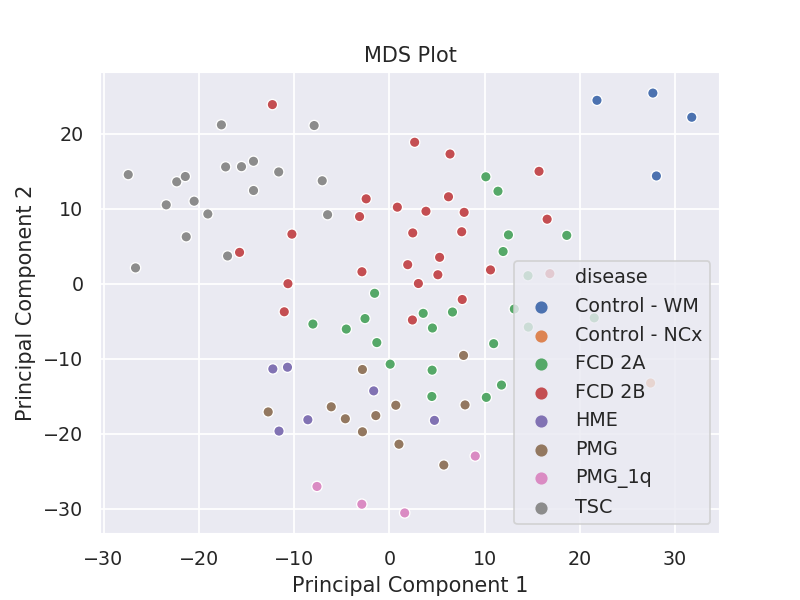

In [121]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, pheno_py, n_components=2, group='disease', components=(0,1)) 

In [122]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.1822953224182129 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [123]:
embedding.shape

(93, 2)

In [124]:
pheno_py[group].unique()

array(['Control - WM', 'Control - NCx', 'FCD 2A', 'FCD 2B', 'HME', 'PMG',
       'PMG_1q', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


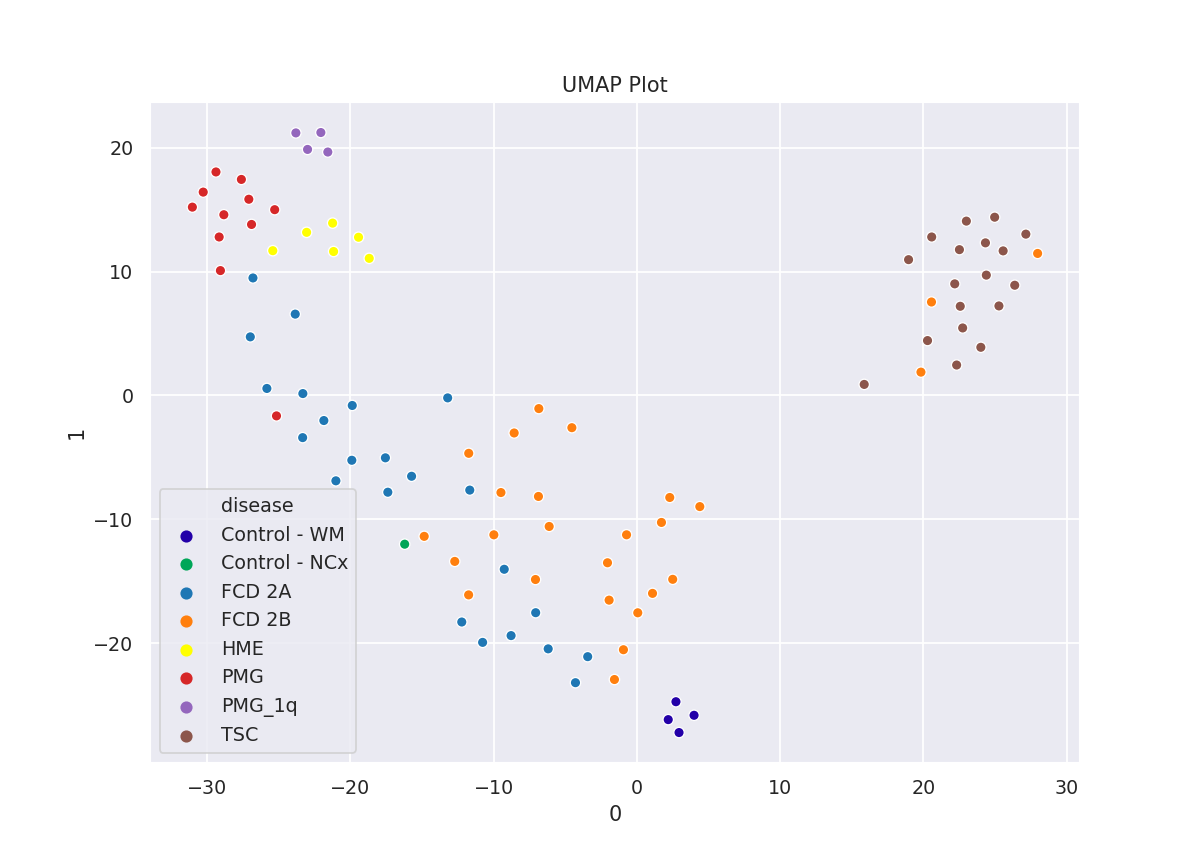

In [125]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink','grey','purple', 'orange']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

### Champ Pipeline

In [8]:
nBeads,_ = preproidat.beadCount(RGset=preproidat.RGset)

In [9]:
_,M = preproidat.getM(Object = preproidat.GRset)  

In [10]:
detP, _ = preproidat.detectionP(RGset=preproidat.RGset)

In [14]:
robjects.r("""function (nbeads,m, detp) {  
                          #colnames(GRset) %in% colnames(RGset)
                          #GRset <- GRset[,colnames(GRset) %in% colnames(mval)]  
                          #pheno<-pData(GRset)
                          #result=list(GRset,pheno)
                          #return(result)
                          cat(nrow(nbeads))
                          cat(nrow(m))
                          cat(nrow(detp))
                          
                          
                          keep <- (rownames(nbeads) %in% rownames(m))
                          nbeads <- nbeads[keep,] 
                          cat(nrow(nbeads))
                          
                 }""")(nBeads, M, detP)

866091
865859
866091
865859


rpy2.rinterface.NULL

In [ ]:
robjects.r("""function (nbeads,m, detp) {  
                          cat(nrow(nbeads))
                          #keep <- (rownames(nbeads) %in% rownames(m))
                          #nbeads <- nbeads[keep,]
                          cat(nrow(nbeads))
                          RemainProbe <- rowSums(is.na(nbeads)) < 1*(ncol(nbeads))
                          cat("    Filtering probes with a beadcount <3 in at least ",0.05*100,"% of samples.")
                          cat("    Removing ",sum(RemainProbe == FALSE)," probes")
                          
                          nbeads <- nbeads[RemainProbe,] 
                          m <- m[RemainProbe,] 
                          cat(nrow(nbeads))
                          cat(nrow(m))
                         # cat(nrow(detp))
                 }""")(nBeads, M, detP)




In [ ]:
beta_py,mval_py, pheno_py=preproidat.champ_processing(pheno=preproidat.pheno_orig, GRset=GRset, RGset=preproidat.RGset_orig, 
                                                      beta=None, M=None, autoimpute=True, filterDetP=True, ProbeCutoff=0, 
                                                      SampleCutoff=0.03,filterBeads=True,beadCutoff=0.05,fixOutlier = True, 
                                                      dropSnPs=True, mask_probes=True,filterXY=True, filterNoCG=True, 
                                                      excludeXreactiveprobes=True, array_type='EPIC', verbose=True, 
                                                      badSampleCutoff=10,rm_badsamples=False,detPFilter=False, detPcut=0.01,
                                                      addQC=False, imputation_method="imputePCA"
                                                      )

In [ ]:
preproidat.pheno#=pandas2ri.py2ri(preproidat.pheno_py)

In [228]:
preproidat.pheno_py

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          6.0  /home/D

In [229]:
preproidat.beta_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                    0.156923                    0.422315   
cg16535257                    0.238335                    0.169370   
cg06325811                    0.478600                    0.593693   
cg16619049                    0.229611                    0.310454   
cg18147296                    0.794871                    0.761840   
...                                ...                         ...   
cg27236246                    0.707283                    0.588184   
cg05615487                    0.810684                    0.793200   
cg22122449                    0.840274                    0.799708   
cg08423507                    0.801299                    0.767194   
cg19565306                    0.054774                    0.024667   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                    0.138946                    0.105289   
cg16535257                    0.221738                    0.183341   
cg06325811                    0.482502                    0.465105   
cg16619049                    0.298304                    0.312625   
cg18147296                    0.739049                    0.733477   
...                                ...                         ...   
cg27236246                    0.669365                    0.668608   
cg05615487                    0.819091                    0.805608   
cg22122449                    0.799685                    0.839762   
cg08423507                    0.791393                    0.833585   
cg19565306                    0.055600                    0.068628   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                    0.166462                    0.149487   
cg16535257                    0.165361                    0.173431   
cg06325811                    0.582051                    0.463323   
cg16619049                    0.219149                    0.136930   
cg18147296                    0.804378                    0.750398   
...                                ...                         ...   
cg27236246                    0.642855                    0.721008   
cg05615487                    0.681758                    0.856475   
cg22122449                    0.811784                    0.785157   
cg08423507                    0.758596                    0.824727   
cg19565306                    0.040871                    0.025904   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                    0.161774                    0.144102   
cg16535257                    0.161027                    0.087939   
cg06325811                    0.618723                    0.453706   
cg16619049                    0.233954                    0.259490   
cg18147296                    0.769173                    0.791540   
...                                ...                         ...   
cg27236246                    0.643210                    0.746420   
cg05615487                    0.621162                    0.830387   
cg22122449                    0.808449                    0.852215   
cg08423507                    0.749548                    0.851625   
cg19565306                    0.047212                    0.053306   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                    0.144201                    0.205977  ...   
cg16535257                    0.177919                    0.220226  ...   
cg06325811                    0.498835                    0.476062  ...   
cg16619049                    0.243354                    0.323805  ...   
cg18147296                    0.698707                    0.698555  ...   
...                                ...                         ...  ...   
cg27236246                    0.743181                    0.764571  ...   
cg05615487                    0.866029          

In [230]:
#without removal of cpgs
preproidat.mval_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                   -2.425602                   -0.451966   
cg16535257                   -1.676168                   -2.294030   
cg06325811                   -0.123569                    0.547148   
cg16619049                   -1.746392                   -1.151270   
cg18147296                    1.954186                    1.677555   
...                                ...                         ...   
cg27236246                    1.272781                    0.514266   
cg05615487                    2.098339                    1.939444   
cg22122449                    2.395259                    1.997369   
cg08423507                    2.011744                    1.720464   
cg19565306                   -4.109100                   -5.305217   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                   -2.631574                   -3.087066   
cg16535257                   -1.811399                   -2.155201   
cg06325811                   -0.101017                   -0.201699   
cg16619049                   -1.234062                   -1.136664   
cg18147296                    1.501894                    1.460490   
...                                ...                         ...   
cg27236246                    1.017556                    1.012621   
cg05615487                    2.178757                    2.051114   
cg22122449                    1.997163                    2.389764   
cg08423507                    1.923611                    2.324541   
cg19565306                   -4.086250                   -3.762488   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                   -2.324052                   -2.508316   
cg16535257                   -2.335536                   -2.252776   
cg06325811                    0.477819                   -0.212037   
cg16619049                   -1.833133                   -2.656042   
cg18147296                    2.039801                    1.588023   
...                                ...                         ...   
cg27236246                    0.847984                    1.369793   
cg05615487                    1.099134                    2.577111   
cg22122449                    2.108708                    1.869701   
cg08423507                    1.651879                    2.234310   
cg19565306                   -4.552587                   -5.232791   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                   -2.373356                   -2.570347   
cg16535257                   -2.381320                   -3.374557   
cg06325811                    0.698456                   -0.267918   
cg16619049                   -1.711209                   -1.512840   
cg18147296                    1.736497                    1.924891   
...                                ...                         ...   
cg27236246                    0.850215                    1.557546   
cg05615487                    0.713387                    2.291533   
cg22122449                    2.077427                    2.527717   
cg08423507                    1.581485                    2.520966   
cg19565306                   -4.334937                   -4.150532   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                   -2.569191                   -1.946695  ...   
cg16535257                   -2.208063                   -1.824075  ...   
cg06325811                   -0.006725                   -0.138246  ...   
cg16619049                   -1.636565                   -1.062311  ...   
cg18147296                    1.213520                    1.212480  ...   
...                                ...                         ...  ...   
cg27236246                    1.532964                    1.699355  ...   
cg05615487                    2.692489          

<IPython.core.display.Javascript object>


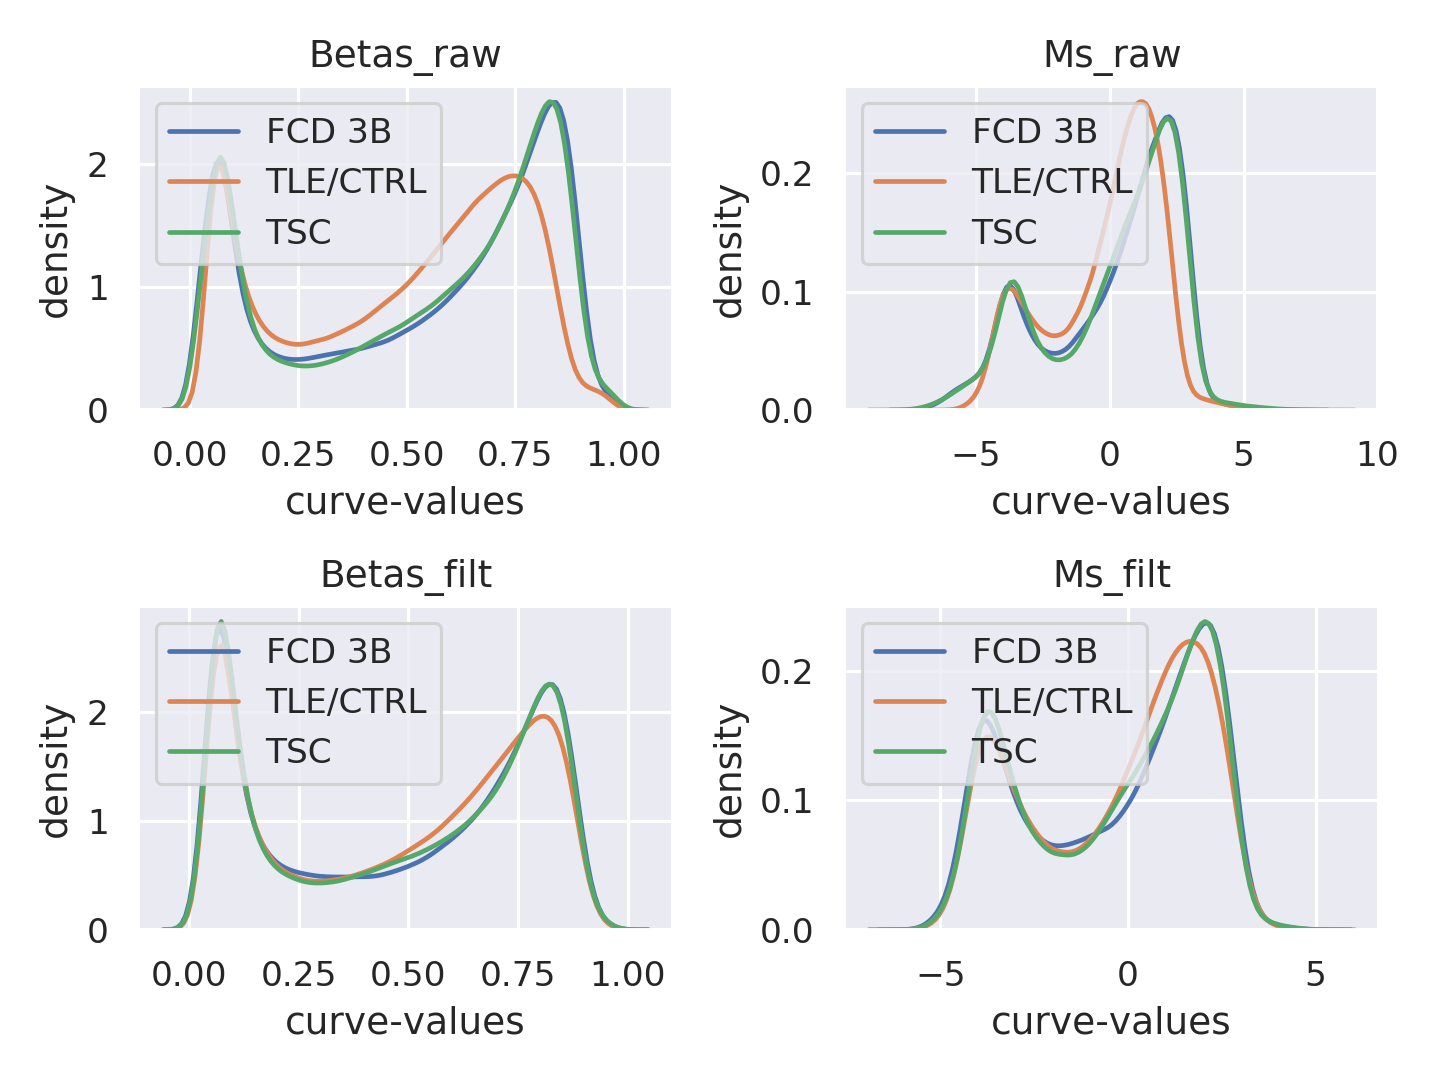

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [215]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


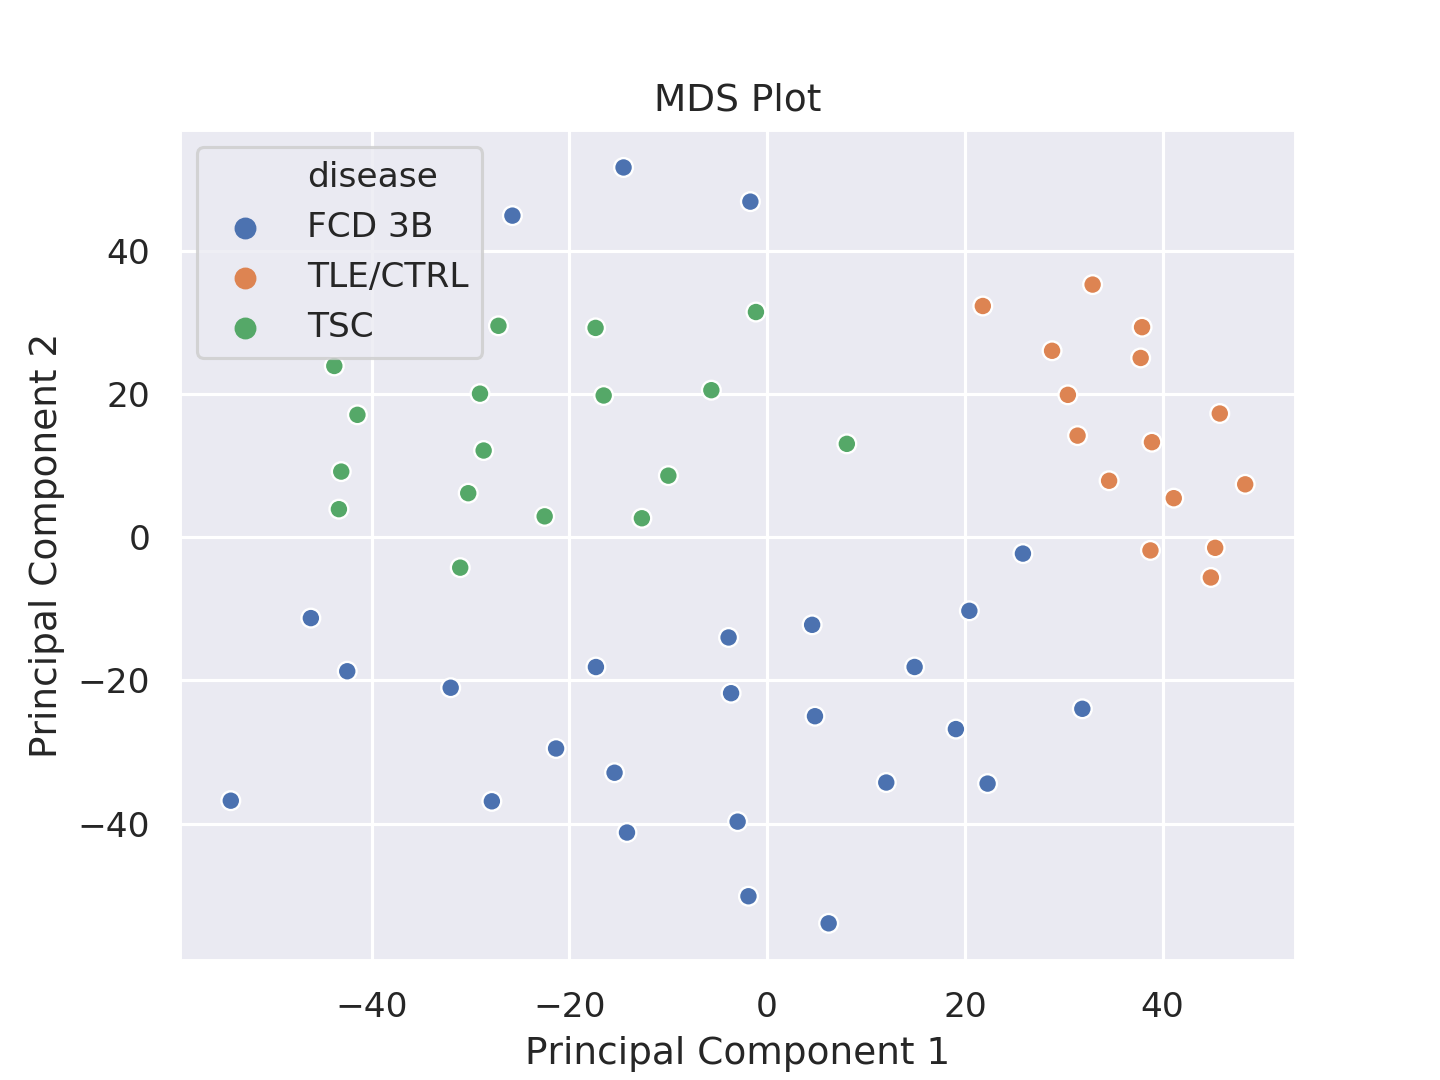

In [216]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


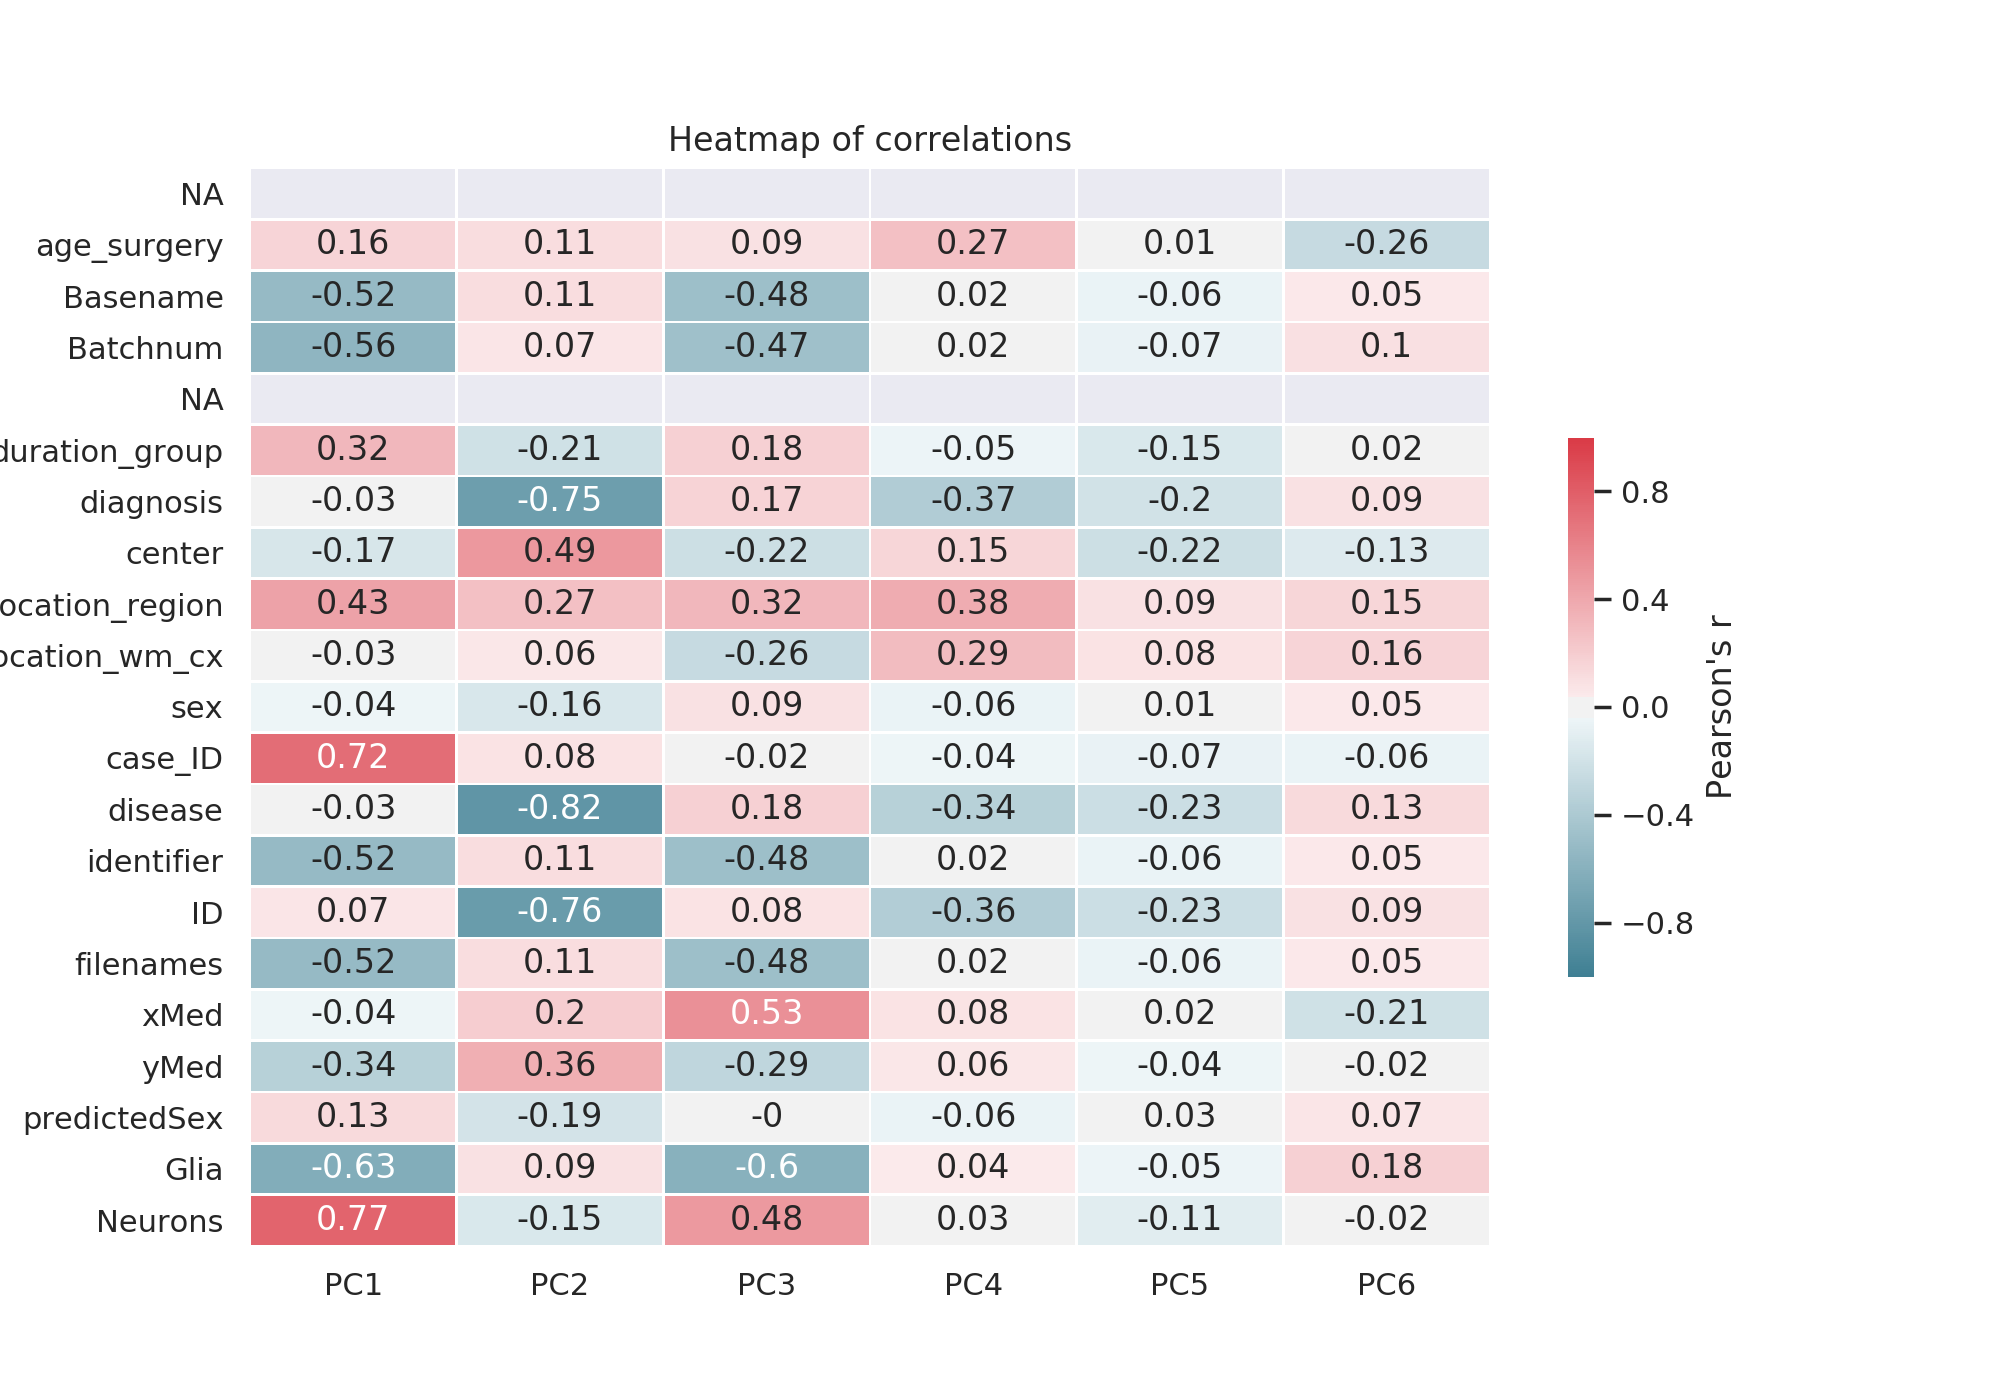

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [62]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [217]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['age_surgery'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=100, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'FCD 3B-TLE/CTRL', 2: 'FCD 3B-TSC', 3: 'TLE/CTRL-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x7fb3fce9f1f0>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation
Computing contrasts for experiment
done


In [218]:
len(preproidat.dmps)

270

In [219]:
preproidat.dectest

diseaseFCD.3B-diseaseTLE.CTRL  diseaseFCD.3B-diseaseTSC  \
Down                          60991.0                   33295.0   
NotSig                       311360.0                  372631.0   
Up                            66204.0                   32629.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       78182.0  
NotSig                    284519.0  
Up                         75854.0

In [220]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    1.625523                    1.376656   
cg23454205                    3.606623                    2.449581   
cg07721625                   -0.673060                   -1.126525   
cg18836486                    0.218615                    0.509064   
cg15119954                    2.140472                    2.109155   
...                                ...                         ...   
cg24214168                    1.866858                    1.287726   
cg17374034                    2.748050                    2.005099   
cg09185990                    1.354958                    0.823633   
cg09641623                    1.240610                    1.904411   
cg26380756                   -5.875005                   -3.896186   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    1.482889                    1.619948   
cg23454205                    2.572846                    3.018373   
cg07721625                   -0.880164                   -1.533080   
cg18836486                   -0.011995                    0.645817   
cg15119954                    1.985843                    1.586965   
...                                ...                         ...   
cg24214168                    1.581110                    2.219128   
cg17374034                    2.494106                    2.367854   
cg09185990                    0.893197                    1.033521   
cg09641623                    1.763762                    1.753078   
cg26380756                   -4.920380                   -4.694199   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.530241                    1.456649   
cg23454205                    2.761661                    2.773963   
cg07721625                   -1.396608                   -1.417659   
cg18836486                   -0.176232                    0.166508   
cg15119954                   -0.389821                    1.931511   
...                                ...                         ...   
cg24214168                    1.941515                    1.471517   
cg17374034                    2.470539                    3.329943   
cg09185990                    1.415032                    1.491031   
cg09641623                    1.384417                    1.678793   
cg26380756                   -5.501275                   -4.962775   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.677050                    1.367676   
cg23454205                    2.685009                    3.453505   
cg07721625                   -0.160210                   -1.467883   
cg18836486                   -0.033176                    0.613579   
cg15119954                    1.946269                    1.069929   
...                                ...                         ...   
cg24214168                    2.035801                    1.976636   
cg17374034                    2.692169                    2.928712   
cg09185990                    1.676090                    1.815277   
cg09641623                    2.291132                    2.149569   
cg26380756                   -4.898247                   -4.696603   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    1.412991                    1.470420  ...   
cg23454205                    3.252103                    3.189240  ...   
cg07721625                   -0.794824                   -0.819848  ...   
cg18836486                    0.184410                   -0.046173  ...   
cg15119954                    1.278142                    1.085269  ...   
...                                ...                         ...  ...   
cg24214168                    1.799948                    1.785057  ...   
cg17374034                    2.933855          

In [221]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    0.755234                    0.721964   
cg23454205                    0.924136                    0.845263   
cg07721625                    0.385438                    0.314137   
cg18836486                    0.537811                    0.587310   
cg15119954                    0.815125                    0.811832   
...                                ...                         ...   
cg24214168                    0.784825                    0.709423   
cg17374034                    0.870434                    0.800565   
cg09185990                    0.718935                    0.638971   
cg09641623                    0.702645                    0.789188   
cg26380756                    0.016754                    0.062936   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    0.736501                    0.754519   
cg23454205                    0.856111                    0.890140   
cg07721625                    0.352040                    0.256803   
cg18836486                    0.497921                    0.610079   
cg15119954                    0.798425                    0.750260   
...                                ...                         ...   
cg24214168                    0.749499                    0.823200   
cg17374034                    0.849257                    0.837708   
cg09185990                    0.650018                    0.671810   
cg09641623                    0.772511                    0.771207   
cg26380756                    0.031967                    0.037192   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.590863                    0.732956   
cg23454205                    0.871494                    0.872446   
cg07721625                    0.275268                    0.272367   
cg18836486                    0.469499                    0.528822   
cg15119954                    0.432857                    0.792296   
...                                ...                         ...   
cg24214168                    0.793435                    0.734968   
cg17374034                    0.847153                    0.909549   
cg09185990                    0.727272                    0.737595   
cg09641623                    0.723043                    0.761995   
cg26380756                    0.021601                    0.031070   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.615217                    0.720713   
cg23454205                    0.865426                    0.916352   
cg07721625                    0.472266                    0.265523   
cg18836486                    0.494251                    0.604751   
cg15119954                    0.793974                    0.677350   
...                                ...                         ...   
cg24214168                    0.803941                    0.797396   
cg17374034                    0.866003                    0.883914   
cg09185990                    0.761655                    0.778725   
cg09641623                    0.830347                    0.816073   
cg26380756                    0.032446                    0.037132   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    0.726991                    0.734820  ...   
cg23454205                    0.905011                    0.901199  ...   
cg07721625                    0.365649                    0.361635  ...   
cg18836486                    0.531912                    0.492000  ...   
cg15119954                    0.708052                    0.679669  ...   
...                                ...                         ...  ...   
cg24214168                    0.776889                    0.775095  ...   
cg17374034                    0.884279          

<IPython.core.display.Javascript object>


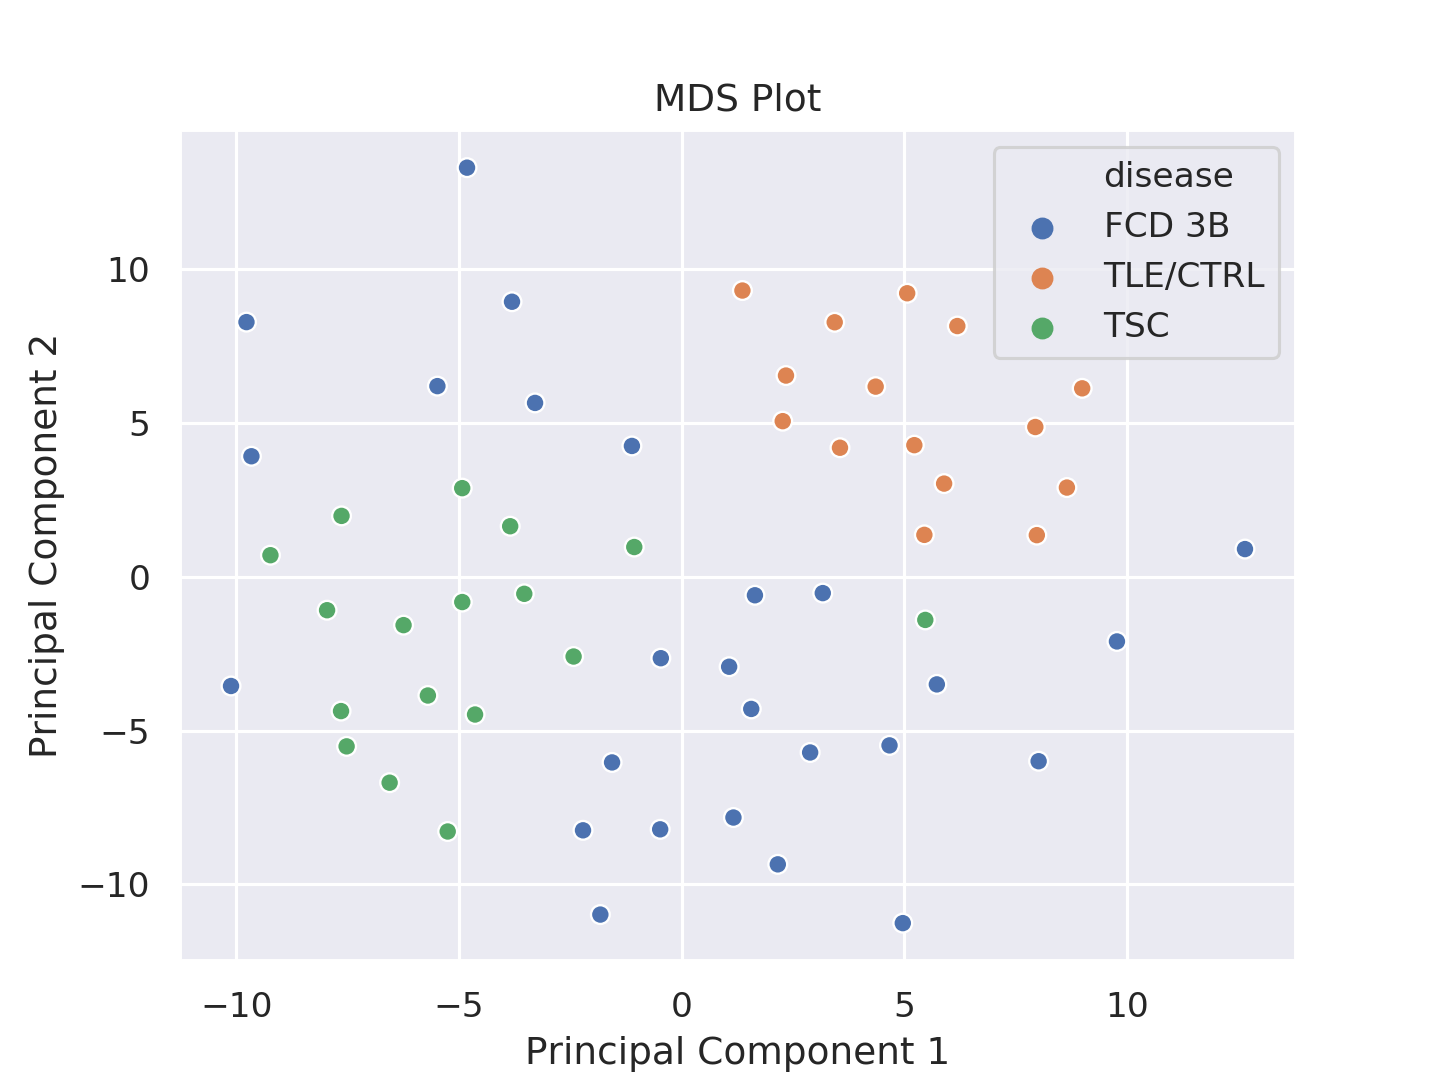

In [222]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

In [223]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.11927628517150879 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [224]:
embedding.shape

(58, 2)

In [225]:
preproidat.pheno_py[group].unique()

array(['FCD 3B', 'TLE/CTRL', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


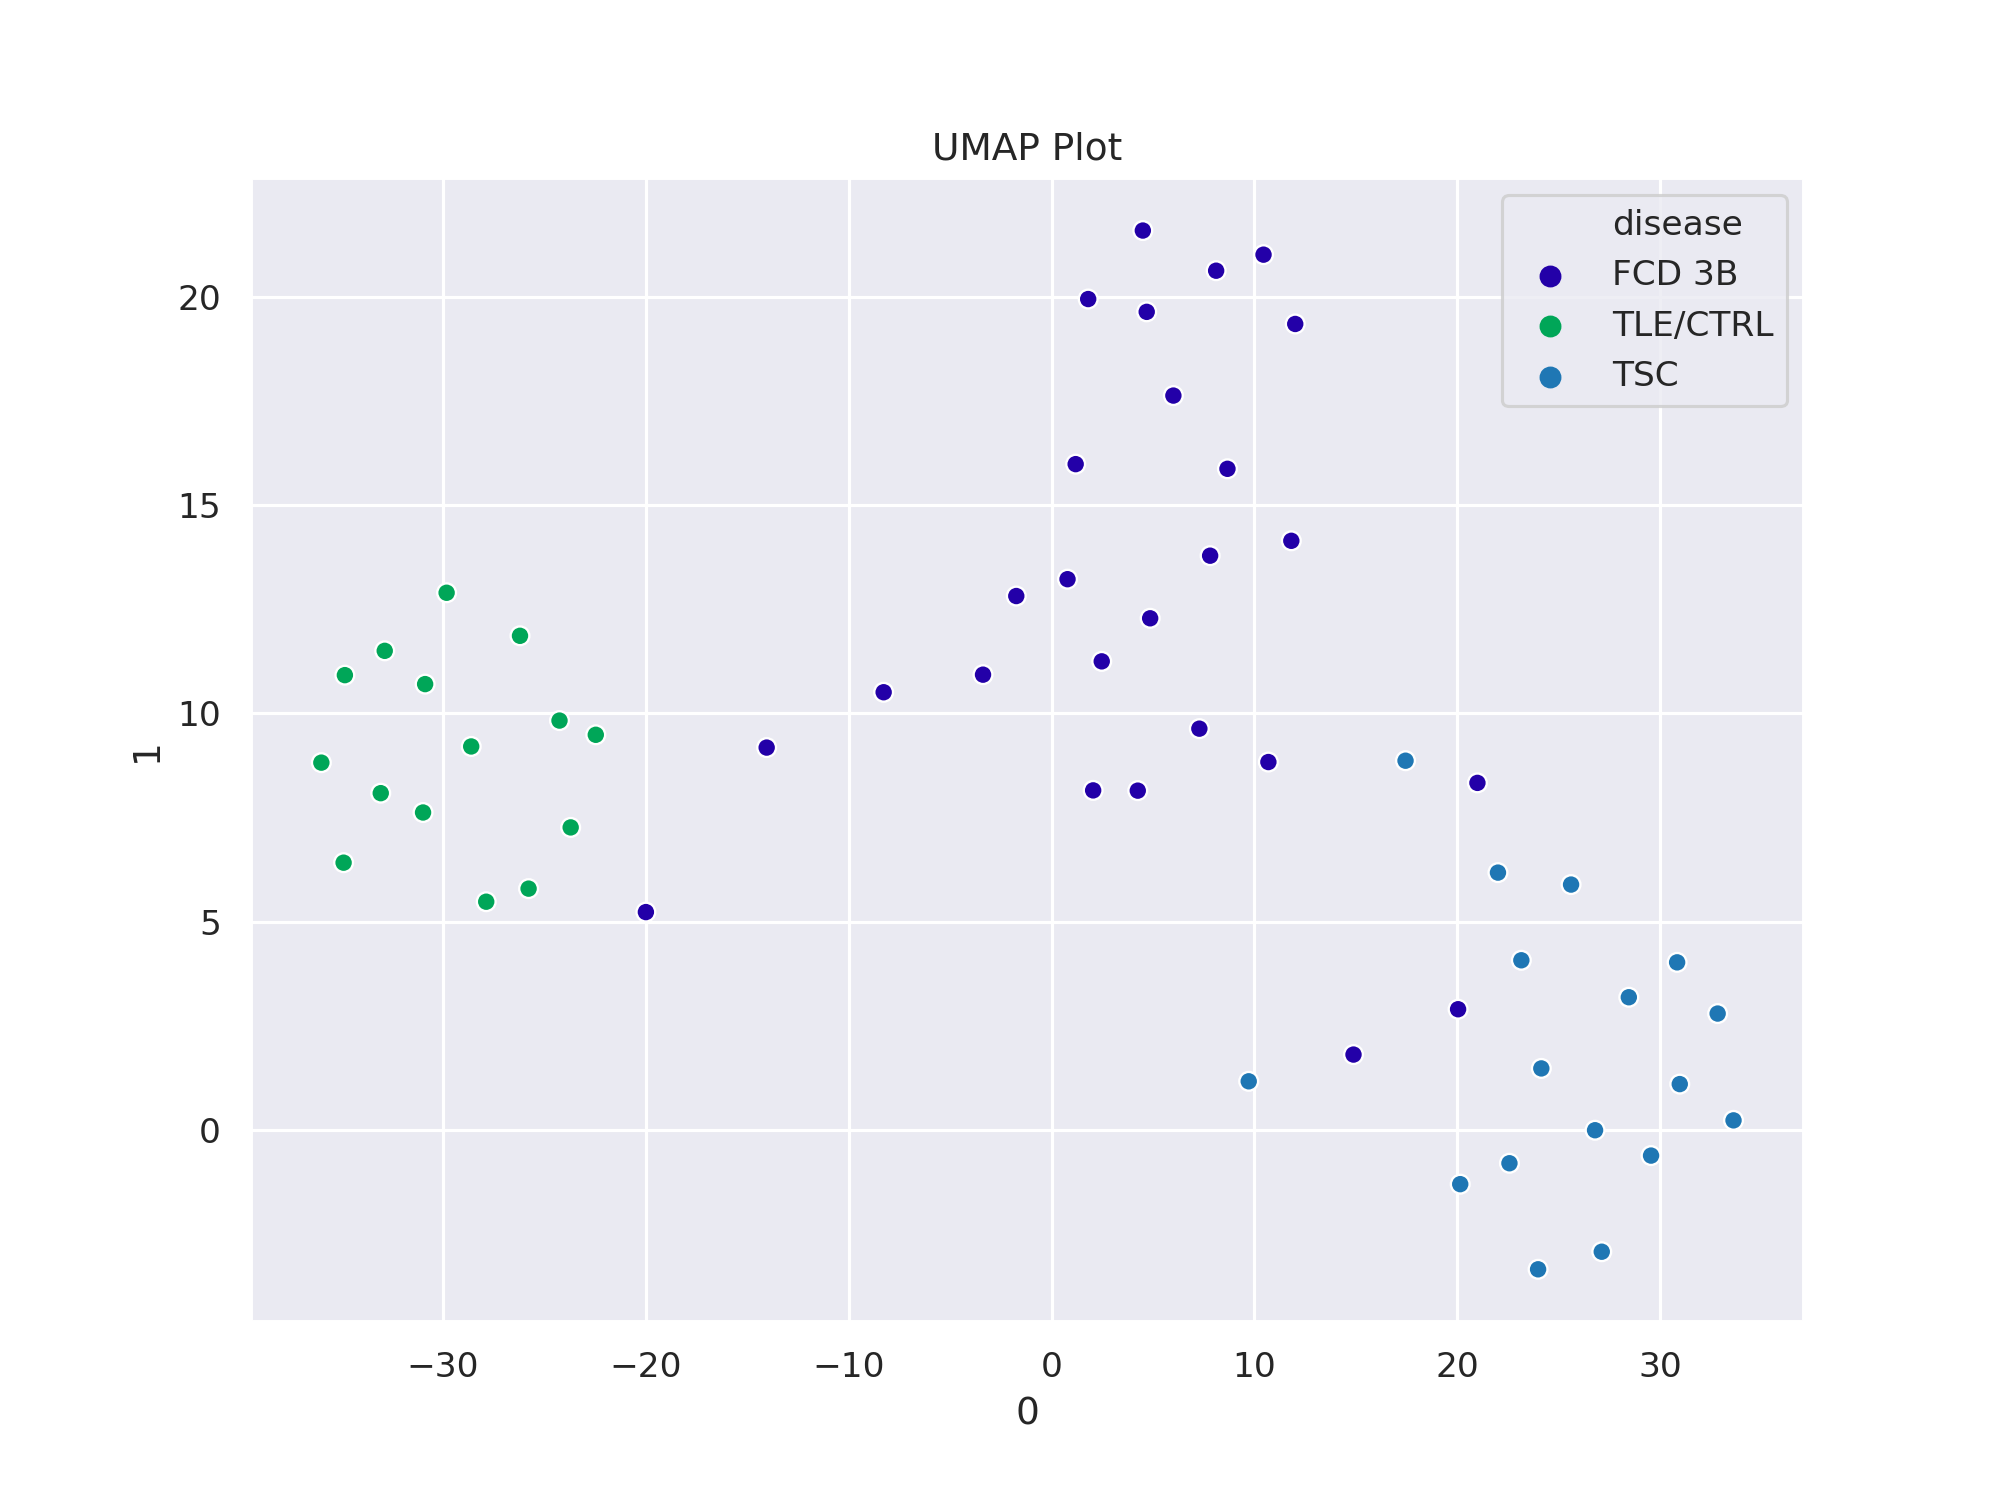

In [226]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [105]:
mval_10000.to_csv('mval_10000.csv', index=False)
beta_10000.to_csv('beta_10000.csv', index=False)
pheno.to_csv('pheno.csv', index=False)

In [66]:
mval_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg13211021                  2.134935                 -0.267658   
cg21099767                  1.286169                  1.470445   
cg07872854                  2.509267                  2.686531   
cg02510381                  2.442296                 -0.267658   
cg19866944                  2.185841                 -0.267658   
...                              ...                       ...   
cg26340968                  2.359707                  1.766196   
cg22498143                  1.395750                  1.123513   
cg07435331                  0.147186                  0.028006   
cg23401282                  1.274249                  0.996342   
cg07732348                  0.703665                  0.174892   

            CTRL.202818860053_R06C01  CTRL.202818860053_R07C01  \
cg13211021                  1.108773                  1.689598   
cg21099767                  3.140734                  0.476749   
cg07872854                  2.683560                 -0.362464   
cg02510381                  2.463107                 -0.362464   
cg19866944                 -0.218542                 -0.362464   
...                              ...                       ...   
cg26340968                  2.405455                  0.207839   
cg22498143                  1.999160                  0.801021   
cg07435331                  0.395173                  0.102514   
cg23401282                  1.826537                  0.856264   
cg07732348                 -0.056589                 -0.657828   

            CTRL.202818860053_R08C01  CTRL.202931510124_R01C01  \
cg13211021                  1.492799                  0.993806   
cg21099767                  2.197652                  1.445300   
cg07872854                  1.281631                  1.942652   
cg02510381                  1.147157                  2.438683   
cg19866944                 -0.232936                 -0.226156   
...                              ...                       ...   
cg26340968                  1.914919                  0.545024   
cg22498143                  2.126898                  0.757936   
cg07435331                  1.110374                 -0.403649   
cg23401282                  1.410207                  1.195406   
cg07732348                  0.391310                 -0.982195   

            CTRL.202931510124_R02C01  CTRL.202931510124_R03C01  \
cg13211021                 -0.467027                 -0.414829   
cg21099767                 -0.467027                 -0.414829   
cg07872854                 -0.467027                 -0.414829   
cg02510381                 -0.467027                 -0.414829   
cg19866944                 -0.467027                 -0.414829   
...                              ...                       ...   
cg26340968                  2.543218                  0.958906   
cg22498143                  0.964945                  0.030419   
cg07435331                  0.802401                  0.508018   
cg23401282                  1.386009                  1.000983   
cg07732348                  0.594276                  0.040423   

            CTRL.202931510124_R04C01  CTRL.202931510124_R05C01  ...  \
cg13211021                  2.940701                  2.545059  ...   
cg21099767                  2.174476                  1.176167  ...   
cg07872854                  3.270340                  0.023084  ...   
cg02510381                  2.548559                  2.055397  ...   
cg19866944                  2.043431                  1.995368  ...   
...                              ...                       ...  ...   
cg26340968                  1.507324                  1.250853  ...   
cg22498143                  1.567181                  1.129651  ...   
cg07435331                  0.582869                 -0.811750  ...   
cg23401282                  1.285192                  0.878997  ...   
cg07732348                 -0.510107                 -0.901

In [106]:
embedding_encods=pd.DataFrame(embedding, index=mval_10000.transpose().index)

In [107]:
embedding_encods.to_csv('embeddings.csv')